# **Exploratory Data Analysis (EDA) Report of Import Export Dataest**

Author: Asad Raza Virk

Email: asad.raza.virk@gmail.com



## 1. **Introduction**

- **Dataset Name**: Imports_Exports V23

- **Source**: https://www.kaggle.com/datasets/willianoliveiragibin/imports-exports-v23/data

- **Date of Analysis**: 2024/10/24

- **Objective** : 
    The objective of this exploratory data analysis (EDA) is to gain insights into the import-export dataset by examining patterns, trends, and key factors that influence international trade. Specifically, this report aims to:

    - **Understand the structure of the dataset**: 
            Analyze the overall composition of the dataset, including the number of records, types of variables, and data completeness.

    - **Identify key trade indicators**: 
        Investigate key metrics such as trade volumes, value of imports and exports, major trade routes, and trading partners over time.

    - **Analyze product categories**: 
        Examine the distribution of different product categories in terms of their import and export values to identify the most significant commodities.

    - **Explore geographical trends**: 
        Analyze the countries or regions involved in the import-export activities to identify the top importing and exporting countries and any regional patterns.

    - **Detect seasonality or time-based trends**: 
        Identify any trends or seasonal variations in trade activities over time (e.g., monthly, quarterly, or yearly trends).

    - **Evaluate data quality**: 
        Detect and handle any missing values, outliers, or inconsistencies in the dataset to ensure reliable results.

    - **Uncover potential correlations**: 
        Investigate relationships between different variables (e.g., country, product type, trade value) to uncover significant patterns that may impact trade dynamics. 


## 2. **Importing the Python Libraries**
Follwoing python libraries are used for the analysis:
        
- `pandas`: For data manipulation and analysis.
- `numpy` : For numerical operations.
- `matplotlib.pyplot` : For data visualization.
- `seaborn` : For data visualization.
    

In [74]:
# Import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Environment Setup

In [75]:
# set the environment to print all the columns
pd.set_option('display.max_columns', None)


### Importing the data
 The dataset is imported from the csv file named as data.csv which is stored in the data folder of the directory as this notebook.
 

In [76]:
# Import the dataset from the data folder of the is project folder , file name is 'data.csv'
dataset = pd.read_csv('data/data.csv')

## 4. **Composition of Dataset**

### 4.1. **Data Structure and Data Types**
The Structure is examined and the Data types of the columns are checked.

### 4.1.1 **Dataset Dimensions**


In [77]:
# Print the dimensions of the dataset using the shape attribute
print("The dataset has {} rows and {} columns".format(dataset.shape[0],dataset.shape[1]))


The dataset has 15000 rows and 14 columns


### 4.1.2. **Inspection of Data Set**


In [78]:
## Inspect the dataset
# the first 5 rows of the dataset using the head method
print(dataset.head())


                         Transaction_ID           Country    Product  \
0  e3e70682-c209-4cac-a29f-6fbed82c07cd          Colombia   describe   
1  f728b4fa-4248-4e3a-8a5d-2f346baa9455             Chile  president   
2  f7c1bd87-4da5-4709-9471-3d60c8a70639  Christmas Island     agency   
3  e443df78-9558-467f-9ba9-1faf7a024204           Finland     policy   
4  23a7711a-8133-4876-b7eb-dcd9e87a1613       New Zealand   positive   

  Import_Export Shipping_Method          Port     Category  Quantity    Value  \
0        Export             Air    Robertbury    Machinery      1979  9506.57   
1        Export             Air      Shahport     Clothing      5763  7100.91   
2        Export             Air      Adamfort    Furniture      2592  7226.42   
3        Export             Air     Juliebury  Electronics      2622  2817.29   
4        Export             Sea  East Randall    Machinery      6975   657.80   

         Date  Customs_Code   Weight       Cluster Corrected_Port  
0  2023-12-0

### 4.1.3 **Data Types**
In this section, we will examine the data types of each column in the dataset to ensure that they are correctly interpreted by pandas.

In [79]:
# print the datatypes of the columns using the dtypes attribute in tabular form
print("Data types of the columns")
print("----------------------------------")
print(dataset.dtypes)

Data types of the columns
----------------------------------
Transaction_ID      object
Country             object
Product             object
Import_Export       object
Shipping_Method     object
Port                object
Category            object
Quantity             int64
Value              float64
Date                object
Customs_Code         int64
Weight             float64
Cluster             object
Corrected_Port      object
dtype: object


### 4.2.4. **The Metadata and Column Information**

The data types are the kinds of values stored in each column of the import-export dataset. Here's an interpretation of each data type:

- **Transaction_ID (object)**: The column contains alphanumeric values, A unique identifier for each trade transaction, ensuring every entry can be tracked and referenced individually.

- **Country (object)**: The country of origin (for imports) or destination (for exports), represented as strings

- **Product (object)**: The specific product involved in the trade, which are also strings.

- **Import_Export (object)**: A clear indicator of whether the transaction is an import or export, stored as a string.

- **Shipping_Method (object)**: The mode of transportation (e.g., Air, Sea, Land) used to move the goods, stored as strings.

- **Port (object)**: The entry or departure port where the transaction was processed, stored as strings.

- **Category (object)**: The product category (e.g., Electronics, Clothing, Machinery), stored as strings.

- **Quantity (int64)**: The amount of the product traded, stored as integers (64-bit precision).

- **Value (float64)**: The monetary value of the trade, in U.S. dollars, stored as floating-point numbers (decimal values).

- **Date (object)**: The date when the transaction occurred. Dates are represented as strings in this column, and may need conversion to a proper datetime format for further analysis.

- **Customs_Code (int64)**: The Harmonized System (HS) or customs code for the product, stored as 64-bit integers.

- **Weight (float64)**: The product’s weight in kilograms, stored as floating-point numbers (decimal values).

### 4.2.5. **Handling of Incorrect Data Types**
The Dates column is converted to datetime format for further analysis.

In [80]:
# convert the datatype of the 'Date' column to datetime using the to_datetime method
dataset['Date'] = pd.to_datetime(dataset['Date'], format='mixed', dayfirst=True)


### 4.2.6. **High Cardinality Columns**
The high cardinality columns are identified and examined to determine if they need further processing.
    

In [81]:
# identify the high cardinality columns in the dataset using the nunique method
print("High cardinality columns")
print(dataset.nunique())

High cardinality columns
Transaction_ID     15000
Country              243
Product              971
Import_Export          2
Shipping_Method        3
Port               10657
Category               5
Quantity            7755
Value              14884
Date                1827
Customs_Code       14881
Weight             14775
Cluster             6278
Corrected_Port      6278
dtype: int64


The following columns with their corresponding unique value counts:

- **Transaction_ID ( 15,000 unique values)**: This column has high cardinality, as it contains a unique ID for almost every transaction, which is typical in datasets where each row represents an individual transaction. This column might not be useful for modeling because it doesn’t provide any meaningful pattern, just a unique identifier.

- **Country (243 unique values)**: With 243 unique values, the cardinality of this column is moderately high. This could be significant when analyzing data based on country-level trade patterns, but for certain machine learning models, this could require special handling (e.g., one-hot encoding or feature embedding).

- **Product (971 unique values)**: The Product column has relatively high cardinality, with 971 distinct products. This indicates a large variety of items being traded, which could impact modeling, especially if you want to analyze trends by product category.

- **Import_Export (2 unique values)**: This column has very low cardinality, as it only contains two distinct values, likely representing whether a transaction is an "Import" or "Export." It’s simple and can be easily encoded.

- **Shipping_Method (3 unique values)**: Similarly, this column has low cardinality, likely indicating three different shipping methods. This won't cause any significant issue during modeling.

- **Port (10,657 unique values)**: The Port column has extremely high cardinality, with 10,657 unique entries. This represents a large number of different ports used in the transactions, which might complicate analysis. Handling high cardinality features like this might involve grouping ports by region or other characteristics to reduce complexity.

- **Category (5 unique values)**: The Category column has very low cardinality, which means only a few distinct categories are represented. This column is straightforward to encode.

- **Quantity (7,755 unique values)**: The Quantity column shows moderately high cardinality, with 7,755 unique values. This variation in quantities traded suggests a diverse range of product sizes/quantities being shipped, and this feature is likely numeric, so handling this in a model would be relatively easy.

- **Value (14,884 unique values)**: The Value column has very high cardinality, indicating a wide range of monetary transaction values. Since this is a continuous numeric feature, it may not require special handling beyond normalization or scaling.

- **Date (1,827 unique values)**: The Date column has moderately high cardinality, reflecting the number of distinct dates on which transactions occurred. Dates may need to be converted into a more useful format (e.g., extracting features like year, month, or day of the week).

- **Customs_Code (14,881 unique values)**: The Customs_Code column also has very high cardinality, with each transaction likely having a different customs classification. It may need special handling like grouping codes into broader categories.

- **Weight (14,775 unique values)**: This column, which likely represents the weight of the traded goods, has high cardinality. Like the Value column, it is a numeric feature, so standard scaling or transformation techniques would be sufficient.

### 4.2.7. **Unit Consistency Check**
The consistency of units in the dataset is checked to ensure that all values are in the same unit of measurement. The `Product` , `port` and `Date` columns had some inconsistencies , which will be handled at the appropriate time. While numerical columns like `Quantity`, `Value`, and `Weight` are expected to be in the same unit of measurement (e.g., kilograms, U.S. dollars), it is important to verify this assumption to avoid errors in analysis.

## 4.3. **Missing Values**
    The missing values in the dataset are checked.

In [82]:
# Check the missing values in the dataset using the isnull method and also print the percentage of missing values 
# by rounding the number to 2 decimal places
missing_values = dataset.isnull().sum()
missing_values_percentage = round((missing_values/len(dataset))*100,2)
print("Missing values in the dataset")
print(pd.concat([missing_values,missing_values_percentage],axis=1,keys=['Missing values','Percentage']))

Missing values in the dataset
                 Missing values  Percentage
Transaction_ID                0         0.0
Country                       0         0.0
Product                       0         0.0
Import_Export                 0         0.0
Shipping_Method               0         0.0
Port                          0         0.0
Category                      0         0.0
Quantity                      0         0.0
Value                         0         0.0
Date                          0         0.0
Customs_Code                  0         0.0
Weight                        0         0.0
Cluster                       0         0.0
Corrected_Port                0         0.0


As per the above table, there are no missing values in the dataset.

## 4.4. **Duplicates**
The duplicate rows in the dataset are checked.

In [83]:
# check ducplicates in the dataset using the duplicated method
duplicates = dataset.duplicated().sum()
print("Number of duplicates in the dataset: ",duplicates)

Number of duplicates in the dataset:  0


---     

## 5 **Distribution of Data**
 In this section , the distribution of the data is examined. The distribution of the data is important to understand the spread of the data and to identify any outliers or anomalies.

### 5.1. **Summary Statistics**
The descriptive statistics of the numerical columns are examined to understand the distribution of the data.

### 5.1.1 **Measures of Central Tendency**
The measures of central tendency (mean, median, and mode) are calculated for the numerical columns to understand the central values around which the data is distributed.

In [84]:
# print the summary statistics of the dataset using the describe method in tabular form
print("Summary statistics of the dataset")
print(dataset.describe())



Summary statistics of the dataset
           Quantity         Value                        Date  Customs_Code  \
count  15000.000000  15000.000000                       15000   15000.00000   
mean    4980.554733   5032.931120  2022-03-02 20:42:48.960000  549507.95920   
min        1.000000    102.120000         2019-09-07 00:00:00  100041.00000   
25%     2517.000000   2552.750000         2020-12-06 00:00:00  325635.50000   
50%     4958.500000   5045.705000         2022-03-02 00:00:00  545432.00000   
75%     7458.250000   7504.700000         2023-05-27 00:00:00  777988.00000   
max    10000.000000   9999.130000         2024-09-06 00:00:00  999964.00000   
std     2866.166690   2857.593897                         NaN  260886.91886   

             Weight  
count  15000.000000  
mean    2492.118859  
min        0.570000  
25%     1243.482500  
50%     2476.135000  
75%     3747.392500  
max     4999.930000  
std     1451.378507  


**Interpretation of Summary Statistics**:
The summary statistics give a detailed overview of the key numeric columns in the dataset, including Quantity, Value, Customs_Code, and Weight, along with some other columns like Date (treated as an object here). Below is the interpretation for each column based on the summary statistics provided:


**Quantity**:

- **Count**: 15,000 entries (all rows have data for this field).
- **Mean**: The average quantity is around 4,980 units.
- **Min**: The minimum quantity is 1, indicating that some transactions involved just a single unit.
- **25% Quartile**: The bottom 25% of the transactions involve quantities up to 2,517 units.
- **50% (Median)**: Half of the transactions involve quantities of up to 4,958 units.
- **75% Quartile**: The top 25% of the transactions have quantities up to 7,458 units.
- **Max**: The largest quantity in a transaction is 10,000 units.
- **Std Dev (Standard Deviation)**: A standard deviation of 2,866 indicates moderate variability in the quantities of items traded.

**Value**:

- **Count**: 15,000 entries (all rows have data for this field).
- **Mean**: The average transaction value is approximately $5,023.
- **Min**: he smallest transaction value is $102.12, indicating a very small trade.
- **25% Quartile**: The bottom 25% of transactions are valued up to $2,552.
- **50% (Median)**: The middle transaction value is $5,045.
- **75% Quartile**: The top 25% of transactions are valued up to %7,504.
- **Max**: The highest transaction value is $9,999.
- **Std Dev (Standard Deviation)**: The standard deviation of $2,857 shows significant variability in transaction values, suggesting a wide range of transaction sizes.

**Customs_Code**:

- **Count**: 15,000 customs codes, meaning no missing data.
- **Mean**: The average customs code is approximately 549,507.95, but since this is likely a categorical or encoded numeric feature, its interpretation as a "mean" might not be meaningful.
- **Min**: The smallest customs code is 100,041.
- **25% Quartile**: The bottom 25% of customs codes are up to 325,635.
- **50% (Median)**: Half of the transactions have customs codes up to 545,432.
- **75% Quartile**: The top 25% of customs codes go up to 777,988.
- **Max**: The highest customs code is 999,964.
- **Std Dev**: The standard deviation of 260,886 indicates that the customs codes are widely spread, reinforcing the idea that this might represent distinct categories or groups.

**Weight**:

- **Count**: 15,000 entries (complete data).
- **Mean**: The average weight of the transactions is approximately 2,492.12 kg.
- **Min**: The smallest weight recorded is 0.57 kg, indicating small parcels or shipments.
- **25% Quartile**: 25% of the transactions weigh up to 1,243.48 kg.
- **50% (Median)**: Half of the transactions weigh up to 2,476.13 kg.
- **75% Quartile**: The top 25% of the transactions weigh up to 3,747.39 kg.
- **Max**: The largest transaction involves 4,999.93 kg of weight.
- **Std Dev**: The standard deviation of 1,451.37 kg shows that there is moderate variation in the weights of the transactions.

**Date**

- **Min**: The earliest transaction date is September 7, 2019.
- **25% Quartile**: By December 6, 2020, 25% of the transactions had already occurred.
- **50% (Median)**: By March 2, 2022, half of the transactions had occurred.
- **75% Quartile**: By May 27, 2023, 75% of the transactions had occurred.
- **Max**: The most recent transaction in the dataset occurred on September 6, 2024.
- **NaN Std Dev**: The standard deviation for the date is not provided, as it is not a numeric column.
 


### 5.1.2 **Measures of Dispersion**
The measures of dispersion (range, variance, standard deviation) are calculated for the numerical columns to understand the spread of the data.

In [85]:
# Measure the Variance, Standard Deviation, IQR and Range  of the numerical columns in the dataset i.e. 'Quantity', 'Value' and 'Weight' columns
# Variance
variance = dataset[['Quantity','Value','Weight']].var()
print("Variance of the columns")
print(variance)
print ("------------------------------------")

# Standard Deviation
std_dev = dataset[['Quantity','Value','Weight']].std()
print("Standard Deviation of the columns")
print(std_dev)
print ("------------------------------------")

# IQR
IQR = dataset[['Quantity','Value','Weight']].quantile(0.75) - dataset[['Quantity','Value','Weight']].quantile(0.25)
print("IQR of the columns")
print(IQR)
print ("------------------------------------")

# Range
Range = dataset[['Quantity','Value','Weight']].max() - dataset[['Quantity','Value','Weight']].min()
print("Range of the columns")
print(Range)
print ("------------------------------------")



Variance of the columns
Quantity    8.214911e+06
Value       8.165843e+06
Weight      2.106500e+06
dtype: float64
------------------------------------
Standard Deviation of the columns
Quantity    2866.166690
Value       2857.593897
Weight      1451.378507
dtype: float64
------------------------------------
IQR of the columns
Quantity    4941.25
Value       4951.95
Weight      2503.91
dtype: float64
------------------------------------
Range of the columns
Quantity    9999.00
Value       9897.01
Weight      4999.36
dtype: float64
------------------------------------


**Interpretation of Measures of Dispersion**

Measures of dispersion tell us how spread out the data is within a dataset. The reuslts provide variance, standard deviation, interquartile range (IQR), and range for the columns Quantity, Value, and Weight. Let’s interpret each measure:

- **Variance**
    Variance quantifies the spread of the data from the mean. A higher variance indicates that the data points are more dispersed.
    - **Quantity (8,214,911)**: The variance of quantity is high, showing that the number of items per transaction varies greatly.
    - **Value (8,165,843)**: The high variance indicates significant fluctuations in the monetary value of transactions.
    - **Weight (2,106,500)**: Though lower than the others, the variance of weight still shows substantial variability in shipment sizes.
  
- **Standard Deviation**
    Standard deviation is the square root of variance and is expressed in the same unit as the data. It’s easier to interpret than variance as it directly reflects the data’s spread.

    - **Quantity (2,866.17)**: The standard deviation suggests that the number of items traded typically deviates from the mean by around 2,866 units.
    - **Value (2,857.59)**: The monetary value of transactions tends to deviate from the mean by approximately $2,857.
    - **Weight (1,451.38)**: The weight of shipments deviates from the mean by about 1,451 kg. This indicates variability in shipment sizes, but not as extreme as the variation in quantity or value.

- **Interquartile Range (IQR)**
    The IQR measures the spread of the middle 50% of the data, and it’s robust to outliers.

    - **Quantity (4,941.25)**: The middle 50% of transactions differ by approximately 4,941 units, which is a large range, again highlighting the diversity in the number of items traded.
    - **Value (4,951.95)**: The monetary value of the middle 50% of transactions differs by about $4,951.
    - **Weight (2,503.91)**: The middle 50% of shipments have a weight difference of around 2,504 kg, indicating moderate dispersion in the weight of traded items.

- R**ange**
    The range is the difference between the maximum and minimum values, which provides the full spread of the data.

    - **Quantity (9,999.00)**: The range of 9,999 units shows the difference between the largest and smallest transactions in terms of quantity. This suggests some very large transactions.
    - **Value (9,897.01)**: The range of $9,897 in value suggests there are transactions that are quite small and others that are much larger.
    - **Weight (4,999.36)**: The range of weights (4,999.36 kg) shows a moderate spread in the size of shipments, from very small to quite large shipments.




### 5.1.3 **Measures of Shape**
The measures of shape (skewness, kurtosis) are calculated for the numerical columns to understand the distribution of the data.
    

In [86]:
# Visualize the measure of shape i.e. skewness and kurtosis of the numerical columns in the dataset i.e. 'Quantity', 'Value' and 'Weight' columns
# Skewness
skewness = dataset[['Quantity','Value','Weight']].skew()
print("Skewness of the columns")
print(skewness)
print ("------------------------------------")

# Kurtosis
kurtosis = dataset[['Quantity','Value','Weight']].kurt()
print("Kurtosis of the columns")
print(kurtosis)
print ("------------------------------------")


Skewness of the columns
Quantity    0.019183
Value       0.008283
Weight      0.025247
dtype: float64
------------------------------------
Kurtosis of the columns
Quantity   -1.182017
Value      -1.193535
Weight     -1.208368
dtype: float64
------------------------------------


**Interpretation of Measures of Shape**

The measures of shape, skewness and kurtosis, describe the distribution of the data in each column. Skewness indicates whether the data is symmetric or biased in one direction, while kurtosis measures the "tailedness" of the distribution, which helps in identifying outliers.

- **Skewness**
    - Skewness measures the asymmetry of the distribution.
        - A skewness of 0 indicates a perfectly symmetrical distribution.
        - Positive skewness (>0) indicates a distribution with a longer tail on the right (right-skewed).
        - Negative skewness (<0) indicates a distribution with a longer tail on the left (left-skewed).
  
    - Interpretation:
  
        - **Quantity (0.019183)**: The skewness is very close to zero, indicating that the distribution of quantity is nearly symmetrical, meaning the number of items traded doesn't have significant outliers or extreme skew in either direction.

        - **Value (0.008283)**: Similarly, the skewness of the value column (in $USD) is close to zero, showing a nearly symmetrical distribution. This suggests that the majority of transactions have values that are evenly spread, without extreme high or low outliers.

        - **Weight (0.025247)**: The skewness is also close to zero, meaning the distribution of shipment weight (in kg) is nearly symmetric, suggesting that small and large shipments occur with similar frequency and there are no extreme outliers on either end.
  
-  **Kurtosis**
    - Kurtosis measures the "tailedness" or the peak of the distribution.
        - A kurtosis of 3 indicates a normal distribution (mesokurtic).
        - A kurtosis < 3 indicates a flatter distribution with fewer extreme values (platykurtic).
        - A kurtosis > 3 indicates a distribution with heavier tails and more extreme outliers (leptokurtic).
  
    - Interpretation:

        - **Quantity (-1.182017)**: The negative kurtosis suggests a platykurtic distribution, meaning the distribution of the number of items traded has fewer outliers and is relatively flatter compared to a normal distribution. The transactions are more centered around the mean, with fewer extreme quantities.

        - **Value (-1.193535)**: The value column (in $USD) also shows a platykurtic distribution. This indicates that most transaction values are clustered around the average value, with fewer extremely high or low-value transactions. The dataset does not have many extreme outliers in terms of transaction value.

        - **Weight (-1.208368)**: The negative kurtosis in the weight column (in kg) suggests that the distribution of weights is also platykurtic, meaning most shipments have weights close to the average. There are fewer extreme weights, indicating a more consistent range of shipment sizes.

- **General Insights**:

    - **Skewness**: All three columns (Quantity, Value, Weight) have very small positive skewness values, meaning that the distributions are nearly symmetrical with minimal skew in any direction. This suggests that the number of items traded, the transaction values, and the shipment weights are fairly balanced in the dataset, with no strong lean toward very high or very low values.

    - **Kurtosis**: All three columns have negative kurtosis, indicating that the distributions are flatter than a normal distribution (platykurtic). This means that the data is concentrated around the mean, with fewer outliers or extreme values in terms of quantity, value, and weight. The transactions are more consistently distributed, without large deviations from the average.
  
- **Conclusion**:
The overall interpretation of skewness and kurtosis shows that the dataset is well-balanced with respect to the number of items traded, their value in dollars, and their weight in kilograms. The distributions are symmetric and exhibit a low likelihood of outliers, which indicates consistent and typical trading behavior across the dataset.

### 5.1.4 **Advance Techniques for Relationships**
The relationships between the numerical columns are examined using advanced techniques like covariance amd correlation matrices to identify any patterns or associations.

In [87]:
# Check the covariance and correlation of the numerical columns in the dataset i.e. 'Quantity', 'Value' and 'Weight' columns
# Covariance
covariance = dataset[['Quantity','Value','Weight']].cov()
print("Covariance of the columns")
print(covariance)
print ("------------------------------------")

# Correlation
correlation = dataset[['Quantity','Value','Weight']].corr()
print("Correlation of the columns")
print(correlation)
print ("------------------------------------")


Covariance of the columns
              Quantity         Value        Weight
Quantity  8.214911e+06 -2.355745e+04  2.823106e+04
Value    -2.355745e+04  8.165843e+06  1.877632e+04
Weight    2.823106e+04  1.877632e+04  2.106500e+06
------------------------------------
Correlation of the columns
          Quantity     Value    Weight
Quantity  1.000000 -0.002876  0.006786
Value    -0.002876  1.000000  0.004527
Weight    0.006786  0.004527  1.000000
------------------------------------


**Interpretation of Advanced Techniques of Relationships: Covariance and Correlation**

This analysis focuses on the covariance and correlation between the columns Quantity, Value, and Weight. These measures help in understanding the relationships and dependencies between these numerical variables.

- **Covariance**
     Covariance measures how two variables change together. A positive covariance means the variables tend to increase together, while a negative covariance means that as one variable increases, the other tends to decrease. The magnitude of the covariance is influenced by the scale of the variables.

    - **Interpretation**:
        - **Quantity and Value (-2.355745e+04)**: The negative covariance indicates that there is a slight inverse relationship between the number of items traded and the value of the transaction. This means that as the quantity increases, the value tends to decrease slightly, although the magnitude of the covariance is small.

        - **Quantity and Weight (2.823106e+04)**: The positive covariance suggests that quantity and weight tend to increase together, meaning that larger quantities of items are usually associated with heavier shipments. The magnitude is moderate, indicating a reasonable relationship between these two variables.

        - **Value and Weight (1.877632e+04)**: The positive covariance indicates that value and weight increase together, although the relationship is relatively weak. This suggests that more expensive transactions tend to involve heavier shipments, but the relationship is not strong.
    - **Key Insight on Covariance**:
        The covariance values suggest that quantity and value move in opposite directions, while weight tends to move in the same direction as both quantity and value, although the relationships are weak or moderate.


- **Correlation**
    Correlation measures the strength and direction of a linear relationship between two variables. It is a standardized measure, ranging from -1 to 1:

    - 1 indicates a perfect positive correlation.
    - -1 indicates a perfect negative correlation.
    - 0 indicates no linear correlation.

    - **Interpretation**:
        - **Quantity and Value (-0.002876)**: The correlation between quantity and value is close to zero, meaning there is almost **no linear relationship** between the number of items traded and the value of the transaction. This suggests that large quantities do not necessarily correspond to higher or lower transaction values.

        - **Quantity and Weight (0.006786)**: The small positive correlation indicates that there is **a very weak positive relationship** between quantity and weight. While larger shipments tend to be heavier, the relationship is almost negligible.

        - **Value and Weight (0.004527)**: Similarly, the correlation between value and weight is close to zero, indicating almost **no linear relationship**. This suggests that the value of a transaction doesn't strongly depend on the weight of the shipment.
    - **Key Insight on Correlation**:
        The correlation values are close to zero for all pairs of variables, indicating that there is no strong linear relationship between quantity, value, and weight. This implies that these variables are largely independent of each other in terms of their linear relationship.

- **General Insights**:
    - **Covariance** provides a more general sense of how variables move together, with small relationships observed between quantity and weight and value and weight.
    - **Correlation** reveals that there is no strong linear dependency between the variables, as all correlation coefficients are close to zero, indicating very weak relationships.
- **Summary**:
    - The relationships between quantity, value, and weight are weak and almost negligible in terms of their linear correlation.
    - While covariance shows a slight tendency for quantity and weight to increase together and a slight inverse relationship between quantity and value, these relationships are too weak to make significant conclusions about their dependencies.

### 5.1.5. **Distribution of Categorical Data**
The distribution of the categorical columns is examined to understand the spread of the data and identify any patterns or anomalies.

In [88]:
# Check the distribution of categorical columns in the dataset i.e. 'Country', 'Product' and 'Import_Export', 'Shipping_Method', 'Port' and 'Category' columns
# Country
print("Distribution of Country column")
print(dataset['Country'].value_counts())
print ("------------------------------------")

# Product
print("Distribution of Product column")
print(dataset['Product'].value_counts())
print ("------------------------------------")

# Import_Export
print("Distribution of Import_Export column")
print(dataset['Import_Export'].value_counts())
print ("------------------------------------")

# Shipping_Method
print("Distribution of Shipping_Method column")
print(dataset['Shipping_Method'].value_counts())
print ("------------------------------------")

# Port
print("Distribution of Port column")
print(dataset['Port'].value_counts())
print ("------------------------------------")

# Category
print("Distribution of Category column")
print(dataset['Category'].value_counts())
print ("------------------------------------")



Distribution of Country column
Country
Congo               133
Korea               113
Pakistan             79
Pitcairn Islands     79
Israel               79
                   ... 
Myanmar              45
Reunion              44
Liechtenstein        44
Faroe Islands        43
Palau                41
Name: count, Length: 243, dtype: int64
------------------------------------
Distribution of Product column
Product
family     28
bank       27
music      27
address    27
card       27
           ..
science     7
state       7
energy      7
deep        6
rich        6
Name: count, Length: 971, dtype: int64
------------------------------------
Distribution of Import_Export column
Import_Export
Import    7569
Export    7431
Name: count, dtype: int64
------------------------------------
Distribution of Shipping_Method column
Shipping_Method
Sea     5054
Air     4995
Land    4951
Name: count, dtype: int64
------------------------------------
Distribution of Port column
Port
West Michael      

**Interpretation of the Distribution of Categorical Columns**:

The results provide the distribution of several categorical columns: Country, Product, Import_Export, Shipping_Method, and Port. Here's the interpretation for each:

- **Country**
    - There are 243 unique countries in the dataset.
    - The highest number of transactions come from Congo (133), followed by Korea (113).
    - Other countries like Pakistan, Pitcairn Islands, and Israel have around 79 transactions each.
    - Smaller countries like Palau have much fewer transactions, around 41.
    - The spread across countries suggests some concentration in a few countries (like Congo and Korea), while many other countries have a smaller presence in the dataset.
    - **Insight:** The dataset seems to have more transactions concentrated in a few key countries, with the rest having much smaller involvement in trade.
  
- **Product**
    - There are 971 unique products in the dataset.
    - The most frequent products are family (28 transactions), followed by bank, music, address, and card (27 transactions each).
    - Other products like science, state, and energy have fewer occurrences (7 transactions).
    - The least frequent products include deep and rich (6 transactions).
    - **Insight**: The product distribution is wide, but most products appear only a few times, with a handful of products occurring more frequently. This suggests a diverse product portfolio, with a few products playing a central role in transactions.
  
- **Import_Export**
    - Import transactions (7,569) slightly outnumber Export transactions (7,431).
    - **Insight:** The import and export activities are almost evenly balanced, suggesting the dataset represents both sides of international trade with nearly equal emphasis.
  
- **Shipping_Method Column**
    - There are three shipping methods: Sea (5,054 transactions), Air (4,995 transactions), and Land (4,951 transactions).
    - The distribution is relatively even across all shipping methods.
    - **Insight**: The use of different shipping methods is balanced, indicating that sea, air, and land transport all play a significant role in trade operations.

- **Port**
    - There are 10,657 unique ports in the dataset, indicating a large geographical spread.
    - The most frequent ports include West Michael and Lake Michael (20 transactions each), followed by Port David (17), New Michael (14), and East Michael (14).
    - Many ports have only 1 transaction each, such as Port Amandaton, Hillborough, and Shahport.
    - **Insight**: The port distribution shows that while a few ports handle a significant number of transactions, the majority of the ports are used very infrequently, which reflects the diversity in the shipping routes used in trade.
    - Port names like Michael, David, and Amandaton suggest a mix of real and fictional port names, which may require further investigation for accuracy.
    - **The problem of port names are like spelling mistakes and the same port name with different spellings is also observed**.
  
- **General Insights**:
    - The Country and Product distributions indicate that a few key entities dominate trade, with many smaller contributors.
    - The balance between Import and Export, as well as the use of Shipping Methods, suggests an evenly distributed logistics operation.
    - The Port distribution suggests global shipping routes, but with a strong reliance on a few key ports.
  
This diversity in categorical data reflects the complexity and wide geographical range of the dataset's trade operations.
  

## Use of Clustering for Correcting Inconsistent Port Names
Clustering is a good approach when there are many variations or when you don't have a predefined list of correct port names. It helps group similar names, allowing you to handle inconsistencies at scale.

1. **Import the necessary libraries for clustering**
   

In [89]:
# import scikit-learn and nltk libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN


2. **Prepare the data**

In [90]:
# Show number of unique values in the 'port' column
print("Number of unique values in the 'Port' column: ", dataset['Port'].nunique())

Number of unique values in the 'Port' column:  10657


3. **Text Vectorization (TF-IDF)**
TF-IDF (Term Frequency-Inverse Document Frequency) to convert port names into numerical vectors that can be used for clustering. TF-IDF works well for text data as it captures the importance of words relative to the entire dataset.

In [91]:
# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(2, 3))  
X = vectorizer.fit_transform(dataset['Port']) 


4. **Clustering the Port Names with DBSCAN**
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) automatically determines the number of clusters and is good for datasets where the number of clusters isn't known.

In [92]:
# Initialize DBSCAN with a small epsilon for short text distances
dbscan = DBSCAN(eps=0.2, min_samples=1, metric='cosine')
dataset['Cluster'] = dbscan.fit_predict(X.toarray())  

# Check which cluster each port belongs to
print(dataset)

                             Transaction_ID              Country    Product  \
0      e3e70682-c209-4cac-a29f-6fbed82c07cd             Colombia   describe   
1      f728b4fa-4248-4e3a-8a5d-2f346baa9455                Chile  president   
2      f7c1bd87-4da5-4709-9471-3d60c8a70639     Christmas Island     agency   
3      e443df78-9558-467f-9ba9-1faf7a024204              Finland     policy   
4      23a7711a-8133-4876-b7eb-dcd9e87a1613          New Zealand   positive   
...                                     ...                  ...        ...   
14995  8535daa3-1da5-4b80-9a0c-955e5aad1f2e             Anguilla      stuff   
14996  f101ae45-9529-46fb-93b5-ae5c81cd7706  Antigua and Barbuda    feeling   
14997  171f03fc-52ac-4e21-b976-45a8fb03879c           Luxembourg  beautiful   
14998  fdf88f9d-94f0-451f-a21d-ca24b95f199b                Congo      watch   
14999  5cc039d0-a052-41fd-bfbb-c9f60c4565ac      North Macedonia       year   

      Import_Export Shipping_Method                

5. **Analyze the Clusters**
The clusters are analyzed to identify patterns and inconsistencies in the port names.

In [93]:
# Display the ports in each cluster
# for cluster in dataset['Cluster'].unique():
#     print(f"\nCluster {cluster}:")
#     print(dataset[dataset['Cluster'] == cluster]['Port'].values)

# save the output in a text file in the data folder
with open('data/ports_clusters.txt', 'w') as f:
    for cluster in dataset['Cluster'].unique():
        f.write(f"\nCluster {cluster}:\n")
        f.write(str(dataset[dataset['Cluster'] == cluster]['Port'].values) + '\n')

6. **Mapping of Corrected Port Names**
The corrected port names are mapped back to the original dataset to replace the inconsistent port names.

In [94]:
# Load the data from the csv and add it to the dataset as a new column
data = pd.read_csv('data/corrected_ports_clusters.csv')
dataset['Corrected_Port'] = data['Corrected_Port']

# Save the dataset to a new csv file
dataset.to_csv('data/data.csv', index=False)

# Print the first 5 rows of the dataset
print(dataset.head())


                         Transaction_ID           Country    Product  \
0  e3e70682-c209-4cac-a29f-6fbed82c07cd          Colombia   describe   
1  f728b4fa-4248-4e3a-8a5d-2f346baa9455             Chile  president   
2  f7c1bd87-4da5-4709-9471-3d60c8a70639  Christmas Island     agency   
3  e443df78-9558-467f-9ba9-1faf7a024204           Finland     policy   
4  23a7711a-8133-4876-b7eb-dcd9e87a1613       New Zealand   positive   

  Import_Export Shipping_Method          Port     Category  Quantity    Value  \
0        Export             Air    Robertbury    Machinery      1979  9506.57   
1        Export             Air      Shahport     Clothing      5763  7100.91   
2        Export             Air      Adamfort    Furniture      2592  7226.42   
3        Export             Air     Juliebury  Electronics      2622  2817.29   
4        Export             Sea  East Randall    Machinery      6975   657.80   

        Date  Customs_Code   Weight  Cluster Corrected_Port  
0 2023-12-07      

In [95]:
# Print the number of unique values in the 'Corrected_Port' column and the 'Port' column
print("Number of unique values in the 'Port' column: ", dataset['Port'].nunique())
print("Number of unique values in the 'Corrected_Port' column: ", dataset['Corrected_Port'].nunique())

Number of unique values in the 'Port' column:  10657
Number of unique values in the 'Corrected_Port' column:  6278


The correction process reduced the number of unique values in the Port column from 10,657 to 6,278 unique values in the Corrected_Port column. Here’s what this reduction signifies:

- **Consolidation of Variants**:

    - Initially, the Port column had many variations of the same port name due to spelling differences, prefixes (like "East," "West," "New"), and minor inconsistencies.
    - By grouping these similar names into clusters and assigning a single corrected name for each cluster, we consolidated these variations. This led to a more standardized dataset, reducing redundant or duplicate representations of the same port.

- **Data Quality Improvement**:
    - The reduction from 10,657 to 6,278 unique values reflects improved data quality and consistency. Each port is now represented by a single, standardized name, making analysis easier and more reliable.
    - This correction minimizes errors in analysis that could arise from treating variations of the same port as distinct entities.

- **Streamlined Analysis**:
    - With fewer unique names, analyses such as grouping, counting, or mapping trade routes by port are more straightforward and accurate. The consolidated names enable a clearer view of trade activity at each distinct port.

In summary, the correction has transformed a dataset with significant inconsistencies into a more streamlined and manageable form, improving the reliability and interpretability of future analyses.

## 5.2. **Visualisation**
The data is visualized using various plots to identify patterns, trends, and relationships in the dataset.

### 5.2.1. **Histogram**
The histograms of the numerical columns are plotted to visualize the distribution of the data.


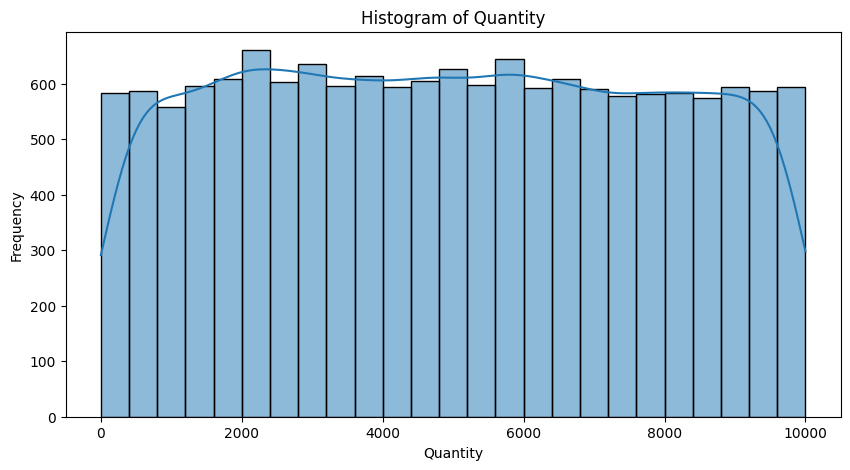

In [96]:
# plot the histogram of the numerical columns in the dataset i.e. 'Quantity', 'Value' and 'Weight' columns also label the x and y axis
# Quantity
plt.figure(figsize=(10,5))
sns.histplot(dataset['Quantity'], kde=True)
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Histogram of Quantity')
plt.show()


- The distribution of **Quantity** is mostly uniform, with some fluctuations across different quantity ranges.
- The KDE curve shows a slight rise around 1,000 and 7,000 units, indicating a small preference for these quantity levels in the dataset.
- There is a minor dip at the start of the range (close to 0) and at the higher end (close to 10,000).
- The overall shape suggests that transactions involve a wide range of item quantities with no strong concentration in any specific range, but there are slightly more transactions in the middle ranges (1,000 - 7,000 units).


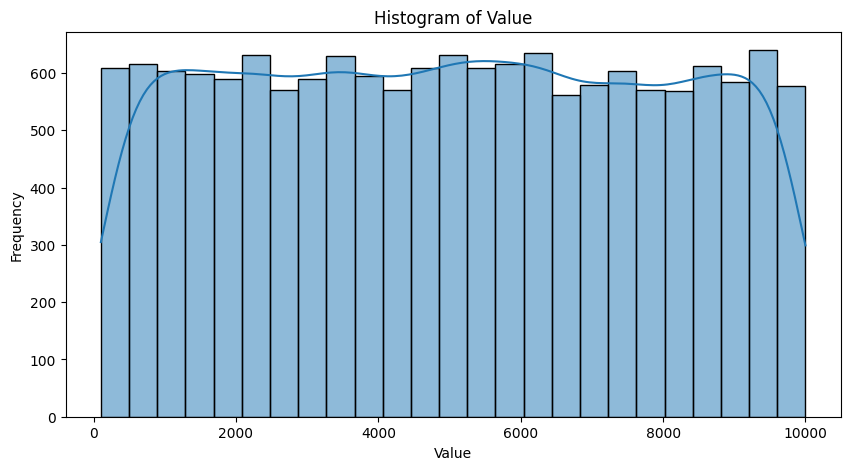

In [97]:
# Value
plt.figure(figsize=(10,5))
sns.histplot(dataset['Value'], kde=True)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Value')
plt.show()

- The **Value** (in USD) is also relatively uniformly distributed, similar to the quantity.
- The KDE curve shows that there is a higher frequency of transactions with values between 1,000 and 7,000 USD.
- There are slight dips near 0 and 10,000 USD, meaning that fewer transactions involve extreme low or high values.
- The uniformity, with some concentration in the middle, suggests that the dataset has a balanced spread of transaction values, without strong bias toward very expensive or very inexpensive transactions.

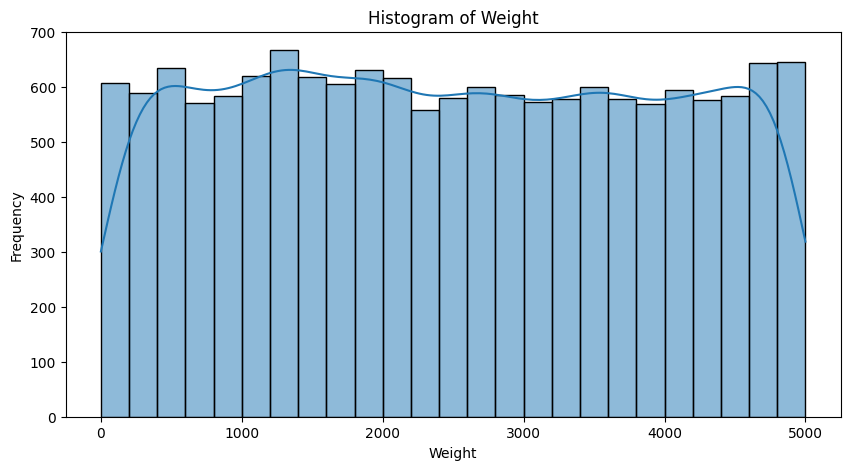

In [98]:
# Weight
plt.figure(figsize=(10,5))
sns.histplot(dataset['Weight'], kde=True)
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.title('Histogram of Weight')
plt.show()


- The **Weight** (in kg) distribution shows similar patterns to the other variables, with a near-uniform spread across the range from 0 to 5,000 kg.
- The KDE curve shows slight peaks around the 1,000 - 2,000 kg and 4,000 - 5,000 kg ranges, meaning that some shipments tend to cluster in these weight ranges.
- Like the other variables, the frequency drops at the extremes (close to 0 kg and near 5,000 kg), with most transactions falling somewhere in the middle.
- This distribution indicates a broad range of shipment sizes, with a slight preference for medium to larger shipments.

**General Insights:**
- All three histograms show relatively uniform distributions with some minor fluctuations, indicating that the dataset has a wide range of values for quantity, value, and weight.
- The slight concentration in the middle ranges (1,000 - 7,000 for Quantity and Value, and 1,000 - 5,000 for Weight) suggests that most transactions are of medium size in terms of quantity, value, and shipment weight, with fewer extreme small or large transactions.
- The KDE curves further reinforce the idea that the distributions are relatively balanced, with no extreme skewness or concentration in any one area.
  
These visualizations suggest that the dataset is well-rounded and diverse in terms of the size, value, and weight of transactions.

### 5.3. **Density Plots**

The density plots of the numerical columns are plotted to estimate the probability density function of variance in the data.

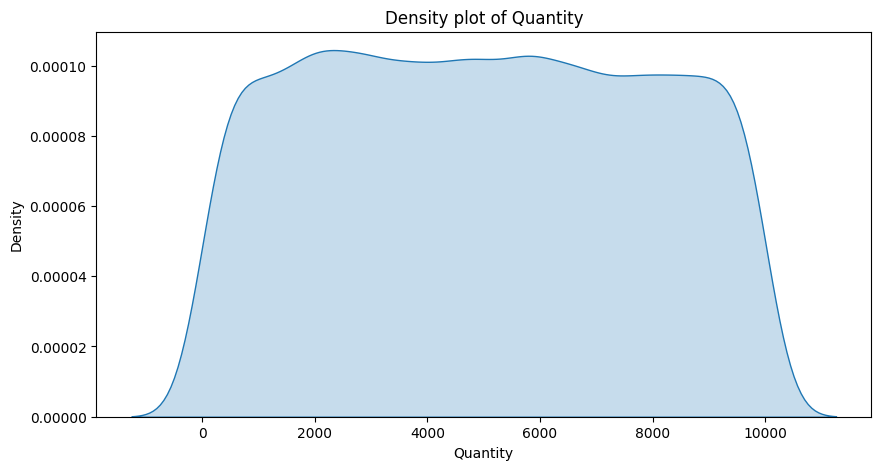

In [99]:
# plot the Density plot of the numerical columns in the dataset i.e. 'Quantity', 'Value' and 'Weight'  to estimate the probability 
# density function of the variable
# Quantity
plt.figure(figsize=(10,5))
sns.kdeplot(dataset['Quantity'], fill=True)
plt.xlabel('Quantity')
plt.ylabel('Density')
plt.title('Density plot of Quantity')
plt.show()



- The plot shows a flat density across the range from 0 to 10,000 units. This suggests a uniform distribution, where all quantity levels have almost equal likelihood of occurring.
- There are small fluctuations around 2,000 and 6,000 units, indicating that transactions involving these quantities might occur slightly more frequently, but overall, the density is evenly spread.
- The variance in the quantity data is consistent across the range, with no significant peaks or drops, indicating that different quantities are equally probable.


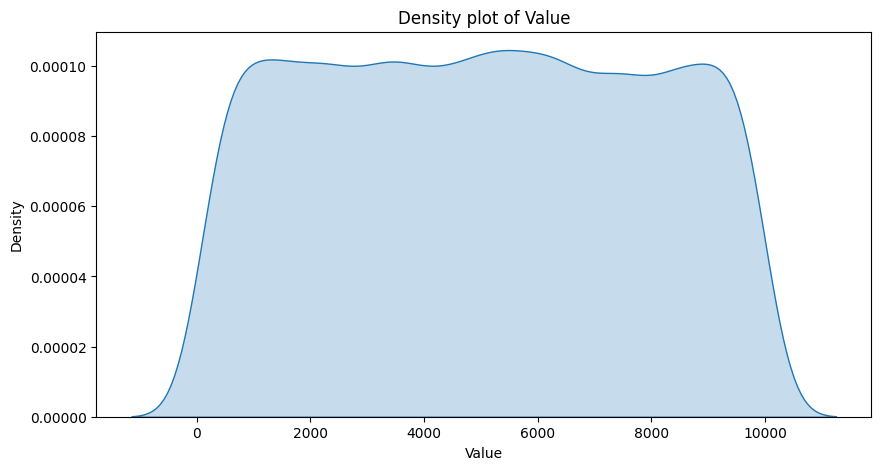

In [100]:
# Value
plt.figure(figsize=(10,5))
sns.kdeplot(dataset['Value'], fill=True)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Density plot of Value')
plt.show()

- The Value (in USD) also shows a relatively flat density, indicating that transactions across the full range of values (from 0 to 10,000 USD) have almost equal likelihood.
- Small fluctuations around 2,000 and 9,000 USD suggest that there may be slightly more transactions involving values in these ranges, but overall, the distribution remains uniform.
- The density plot shows a uniform spread of transaction values, meaning the dataset contains a wide range of transaction amounts without significant variance in specific value ranges.

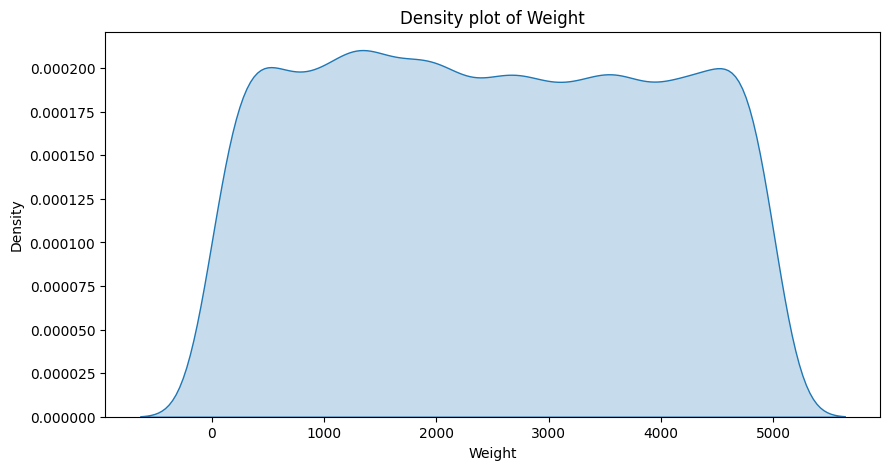

In [101]:

# Weight
plt.figure(figsize=(10,5))
sns.kdeplot(dataset['Weight'], fill=True)
plt.xlabel('Weight')
plt.ylabel('Density')
plt.title('Density plot of Weight')
plt.show()

- The Weight (in kg) distribution follows a similar pattern, with a flat density across the range from 0 to 5,000 kg.
- Slight fluctuations can be seen around 1,000 and 4,000 kg, suggesting these weight ranges might occur slightly more often, but overall, the distribution remains even.
- The uniform shape of the density plot indicates that the variance in weights is consistent across different shipment sizes, with no strong bias toward small or large weights.


### 5.4. **Box Plots**
The box plots of the numerical columns are plotted to visualize the spread of the data and identify any outliers, quartiles, and median values.

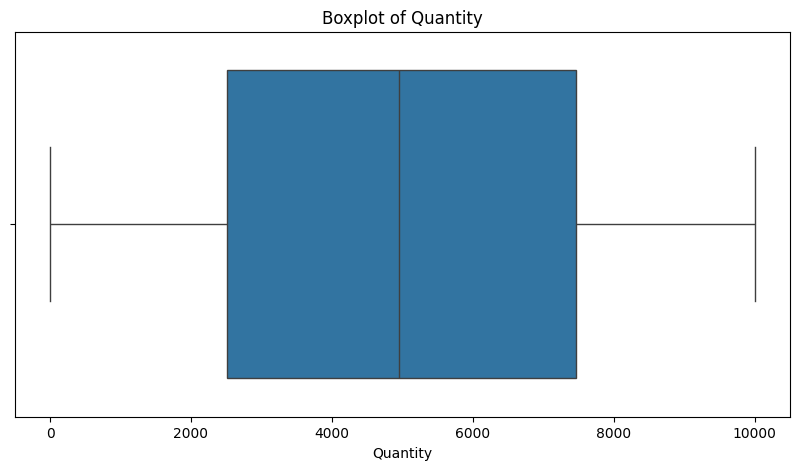

In [102]:
# plot the boxplot of the numerical columns in the dataset i.e. 'Quantity', 'Value' and 'Weight' columns
# Quantity
plt.figure(figsize=(10,5))
sns.boxplot(x=dataset['Quantity'])
plt.xlabel('Quantity')
plt.title('Boxplot of Quantity')
plt.show()


**Interpretation of the Box Plot for Quantity**

The box plot provides a summary of the distribution of the Quantity variable, highlighting key descriptive statistics such as the median, quartiles, and spread of the data. Here’s a breakdown:

- **Median (50th Percentile)**:
    - The line inside the box represents the median value, which is around 5,000 units.
    - This indicates that half of the transactions involve quantities less than or equal to 5,000, and half involve more.
  
- **Interquartile Range (IQR)**:
    - The box itself represents the interquartile range (IQR), which covers the middle 50% of the data.
    - The lower boundary of the box is around 2,500 units (25th percentile), and the upper boundary is around 7,500 units (75th percentile).
    - This means that 50% of the transactions involve quantities between 2,500 and 7,500 units.
  
- **Whiskers**:
    - The whiskers extend from the box and represent the range of the data (excluding any outliers, if there were any).
    - The left (lower) whisker starts at 0 units, indicating that the smallest transaction involves no items.
    - The right (upper) whisker extends to 10,000 units, indicating that the largest transaction involves 10,000 items.
    - There are no apparent outliers in the data, as there are no points beyond the whiskers.
  
- **Symmetry**:
    - The box plot looks fairly symmetrical, suggesting that the quantity data is evenly distributed around the median.
    - The whiskers are approximately the same length, further supporting the idea that the data is spread relatively equally on both sides of the median.
  
- **General Insights**:
    - **Spread of Data**: The data shows a wide range of transaction quantities, from 0 to 10,000 units, with the middle 50% of transactions involving quantities between 2,500 and 7,500 units.
    - **No Outliers**: The absence of outliers suggests that there are no extreme values in the dataset that are significantly different from the rest of the data.
  
This box plot shows that the quantity of items involved in transactions is fairly evenly spread, with a typical transaction involving about 5,000 units, and no extreme values skewing the data.


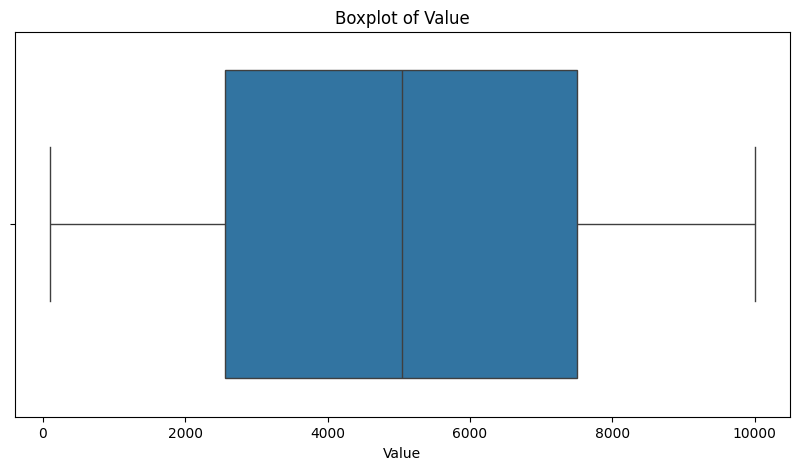

In [103]:
# Value
plt.figure(figsize=(10,5))
sns.boxplot(x=dataset['Value'])
plt.xlabel('Value')
plt.title('Boxplot of Value')
plt.show()

**Interpretation of the Box Plot for Value**

The box plot provides a summary of the Value variable (in USD) and highlights key descriptive statistics such as the median, quartiles, and the spread of the data.

- **Median (50th Percentile)**:
    - The line inside the box represents the median value, which is around 5,000 USD.
    - This indicates that half of the transactions have values less than or equal to 5,000 USD, and half are more than this amount.
  
- **Interquartile Range (IQR)**:
    - The box itself represents the interquartile range (IQR), which covers the middle 50% of the data.
    - The lower boundary of the box (25th percentile) is around 2,500 USD, and the upper boundary (75th percentile) is around 7,500 USD.
    - This means that 50% of the transactions have values between 2,500 and 7,500 USD.
  
- **Whiskers**:
    - The whiskers extend from the box and represent the range of the data, excluding any outliers.
    - The left (lower) whisker starts near 0 USD, indicating that some transactions have very low values.
    - The right (upper) whisker extends to 10,000 USD, meaning the highest transaction values are around this amount.
    - Like the box plot for quantity, there are no visible outliers beyond the whiskers.

-   **Symmetry**:
    - The box plot looks fairly symmetrical, with both whiskers and the box itself being evenly distributed around the median.
    - This symmetry suggests that the value data is uniformly distributed, with no strong skew to one side or the other.

- **General Insights**:
    - **Spread of Data**: The values of the transactions vary from close to 0 USD to 10,000 USD, with the middle 50% of transactions having values between 2,500 and 7,500 USD.
    - **No Outliers**: There are no extreme outliers in the dataset, as no points fall beyond the whiskers.
    - **Uniform Distribution**: The symmetry of the box plot suggests that transaction values are fairly evenly distributed, with no significant skewness.

This box plot shows that the Value of transactions is well-distributed, with most transactions falling between 2,500 and 7,500 USD, and no extreme values in the dataset.

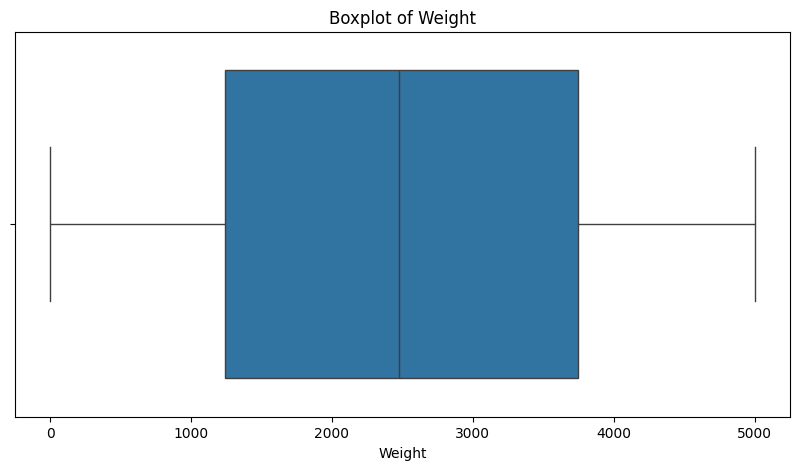

In [104]:
# Weight
plt.figure(figsize=(10,5))
sns.boxplot(x=dataset['Weight'])
plt.xlabel('Weight')
plt.title('Boxplot of Weight')
plt.show()


**Interpretation of the Box Plot for Weight**

The box plot summarizes the distribution of the Weight variable (likely in kg), showcasing key descriptive statistics like the median, quartiles, and the overall range.

- **Median (50th Percentile)**:
    - The line inside the box represents the median weight, which is around 2,500 kg.
    - This indicates that half of the transactions have weights less than or equal to 2,500 kg, and the other half have weights above this amount.

- **Interquartile Range (IQR)**:
    - The box itself represents the interquartile range (IQR), which covers the middle 50% of the data.
    - The lower boundary of the box (25th percentile) is around 1,250 kg, and the upper boundary (75th percentile) is around 3,750 kg.
    - This means that 50% of the transactions have weights between 1,250 and 3,750 kg.

- **Whiskers**:
    - The whiskers extend from the box and represent the range of the data, excluding any outliers.
    - The left (lower) whisker starts close to 0 kg, indicating that some shipments have very low weights.
    - The right (upper) whisker extends to 5,000 kg, meaning the heaviest transactions involve shipments of 5,000 kg.
    - There are no visible outliers beyond the whiskers.

- **Symmetry**:
    - The box plot appears symmetrical, with the whiskers and the box evenly distributed around the median. This suggests a balanced spread of weights around the median value.

- **General Insights**:
    - **Spread of Data**: The weights of the shipments range from close to 0 kg to 5,000 kg, with the middle 50% of transactions having weights between 1,250 and 3,750 kg.
    - **No Outliers**: There are no extreme outliers in the data, as no points are plotted outside the whiskers.
    - **Uniform Distribution**: The symmetry in the box plot suggests that the distribution of weights is fairly even, with no significant skew.

This box plot suggests that the weight of shipments is well distributed, with typical transactions falling between 1,250 kg and 3,750 kg, and no extreme values in the dataset.

### 5.5 **Violin Plots**

The violin plots of the numerical columns are plotted to visualize the distribution of the data and compare the spread of the data between different categories.

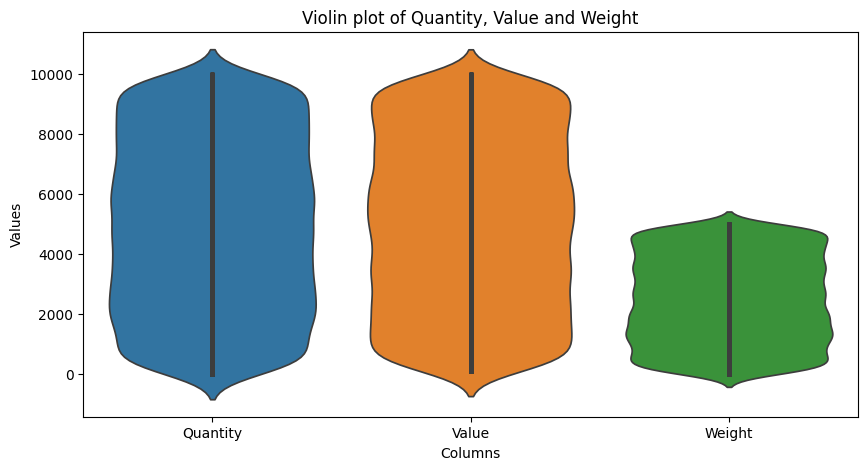

In [105]:
# plot the violin plot of the numerical columns in the dataset i.e. 'Quantity', 'Value' and 'Weight' columns
# show all three in one plot
plt.figure(figsize=(10,5))
sns.violinplot(data=dataset[['Quantity','Value','Weight']], inner="points")
plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Violin plot of Quantity, Value and Weight')
plt.show()


**Interpretation of the Violin Plot for Quantity, Value, and Weight**

The violin plot combines features of a box plot with a density plot, providing insights into the distribution of the data while also showing the probability density at different values. Here's an interpretation of each variable:

1. **Quantity**
- The violin plot for Quantity shows a fairly uniform distribution with slight bulges at the upper and lower portions, indicating a slight concentration of transactions around those values.
- The width of the violin shows how frequent each value range is. Since the plot has almost the same width throughout, it suggests that the quantity data is fairly evenly distributed, meaning that all quantity ranges occur with similar frequency.
- The central vertical line represents the interquartile range (IQR) and the median. The median appears around 5,000, confirming the uniform spread observed in previous plots.
2. **Value**
- The violin plot for Value (in USD) is very similar to that of Quantity, indicating a nearly uniform distribution of transaction values across the range.
- The slight bulges at both the top and bottom indicate that transactions around 1,000 and 9,000 USD are slightly more common than values in the middle.
- The central line suggests that the median value is also around 5,000 USD, with the interquartile range spread similarly to the Quantity plot.
3. **Weight**
- The violin plot for Weight (in kg) has a different shape compared to Quantity and Value. It has a slight hourglass shape, indicating that most shipments cluster around the middle values (between 1,000 and 4,000 kg).
- The plot is narrower at the extremes (close to 0 and 5,000 kg), suggesting that there are fewer very small or very large shipments.
- The central line shows that the median weight is around 2,500 kg, consistent with the previous plots, and most of the data is centered around the middle, with fewer extremes.

**General Insights:**
  - **Quantity and Value**: Both show almost uniform distributions, with slight concentration at the lower and upper ends. This suggests that all quantity and value ranges are relatively equally represented in the dataset.
  - **Weight**: The weight distribution is slightly more concentrated in the middle, indicating that most shipments are around average weights, with fewer very light or very heavy shipments.
  - **No Skew**: None of the distributions show significant skewness, which means that the data is **well-balanced** across different ranges for all three variables.
  
The violin plot provides a clear visualization of how Quantity, Value, and Weight are distributed, with Quantity and Value being fairly uniform, and Weight having a more typical bell-shaped distribution centered around the median.

### 5.6 **Pair Plots**
The pair plots of the numerical columns are plotted to visualize the relationships between the variables and identify any patterns or correlations.

<Figure size 1000x500 with 0 Axes>

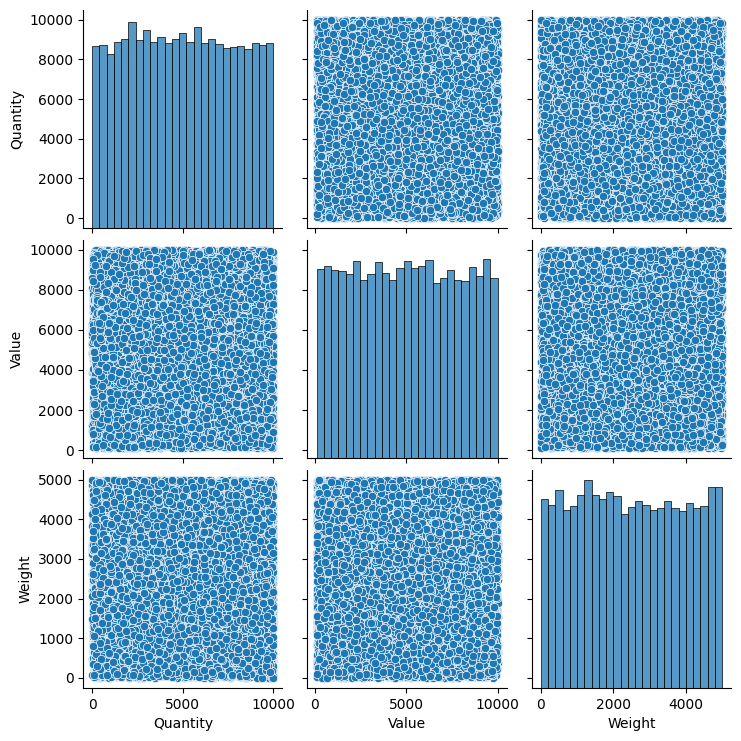

In [106]:
# plot the pairplot of the numerical columns in the dataset i.e. 'Quantity', 'Value' and 'Weight' columns
plt.figure(figsize=(10,5))
sns.pairplot(dataset[['Quantity','Value','Weight']])
plt.show()

**Interpretation of the Pair Plot**

A pair plot (or scatter plot matrix) visualizes the pairwise relationships between multiple variables, along with the distribution of each individual variable. In this case, the pair plot shows the relationships between Quantity, Value, and Weight. Here's the detailed interpretation:

1. **Diagonal Elements (Histograms)**:
- The **diagonal** elements show the histograms for each variable (Quantity, Value, Weight), giving an insight into their individual distributions.

- **Quantity**: The histogram shows a relatively uniform distribution, with some small fluctuations, indicating that quantities of items in transactions are spread fairly evenly across the range of 0 to 10,000 units.

- **Value**: The value histogram also shows a uniform distribution, similar to Quantity, with values spread evenly from 0 to 10,000 USD.

- **Weight**: The distribution for Weight (in kg) shows a slightly different pattern, with some minor peaks and valleys, but overall the distribution is still relatively even, with a slightly more pronounced concentration of transactions around 1,000 to 4,000 kg.

2. **Scatter Plots (Off-diagonal elements)**:
The scatter plots between pairs of variables are displayed in the off-diagonal elements of the matrix. These help identify potential relationships between variables.

- **Quantity vs Value**:
    - The scatter plot for Quantity and Value shows a random pattern with no clear trend. The points are spread evenly across the entire range.
    - This suggests no strong linear relationship between the quantity of items in a transaction and the transaction’s value. In other words, higher quantities do not necessarily correspond to higher values, and vice versa.

- **Quantity vs Weight**:
    - The scatter plot between Quantity and Weight also shows a random distribution of points with no visible pattern or trend.
    - This suggests that there is no significant relationship between the number of items and the weight of the shipment. Large or small quantities of items do not appear to correlate directly with the weight.
- **Value vs Weight**:
    - The scatter plot for Value and Weight shows a similar random spread as the other pairs, indicating that the monetary value of transactions does not strongly correlate with the weight of the shipment.
    - Transactions with higher values do not necessarily involve heavier shipments, and vice versa.


3. **General Insights**:
- **No Strong Relationships**: The scatter plots between Quantity, Value, and Weight show no clear patterns or trends, indicating that these variables are largely independent of one another. There is no significant linear relationship between the quantity of items, their value, and their weight.
- **Uniform Distributions**: Both the Quantity and Value histograms show a nearly uniform distribution, meaning the transactions are evenly distributed across different ranges. Weight shows a more varied distribution, but it’s still fairly balanced.
  
In summary, the pair plot highlights that Quantity, Value, and Weight do not have strong pairwise relationships and are relatively independent of one another in this dataset. The uniformity in the distributions suggests that the dataset is diverse, covering a wide range of transaction types.

## 5.3. **Normality Tests**
The normality tests are performed on the numerical columns to check if the data follows a normal distribution.

### 5.3.1. **Shapiro-Wilk Test**
The Shapiro-Wilk test is used to check the normality of the data. The null hypothesis is that the data is normally distributed.

In [107]:
# perform the shapiro-wilk test to check the normality of the numerical columns in the dataset i.e. 'Quantity', 'Value' and 'Weight' columns
from scipy.stats import shapiro

# Quantity
stat, p = shapiro(dataset['Quantity'])
print('Quantity:')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
print('------------------------------------')

# Value
stat, p = shapiro(dataset['Value'])
print('Value:')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
print('------------------------------------')

# Weight
stat, p = shapiro(dataset['Weight'])
print('Weight:')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
print('------------------------------------')



Quantity:
Statistics=0.957, p=0.000
Sample does not look Gaussian (reject H0)
------------------------------------
Value:
Statistics=0.955, p=0.000
Sample does not look Gaussian (reject H0)
------------------------------------
Weight:
Statistics=0.954, p=0.000
Sample does not look Gaussian (reject H0)
------------------------------------


c:\Users\Asad Raza Virk\miniconda3\envs\python_eda\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 15000.
  res = hypotest_fun_out(*samples, **kwds)


1. **Understanding the Shapiro-Wilk Test**:
    - The Shapiro-Wilk test is used to assess whether a given dataset follows a normal distribution.
    - The null hypothesis (H0) for this test is that the data is normally distributed.
    - If the p-value is greater than 0.05, you fail to reject H0, meaning the data may be normal.
    - If the p-value is less than 0.05, you reject H0, meaning the data does not appear to be normally distributed.

2. **Test Results Interpretation**:
For each column, the test provided the following results:

- **Quantity**:
    - Statistics=0.957, p=0.000.
    - **Interpretation**: The p-value is extremely small (0.000), which means we reject the null hypothesis (H0).
    - **Conclusion**: The Quantity data does not follow a normal (Gaussian) distribution.
- **Value**:
    - Statistics=0.955, p=0.000.
    - **Interpretation**: Similarly, the p-value is 0.000, so we reject H0.
    - **Conclusion**: The Value data does not follow a normal (Gaussian) distribution.
- **Weight**:
    - Statistics=0.954, p=0.000.
    - **Interpretation**: The p-value is 0.000 again, so we reject H0.
    - **Conclusion**: The Weight data does not follow a normal (Gaussian) distribution.

3. **Implications of Non-Gaussian Distributions**:
    - **Non-normality**: Since the data for Quantity, Value, and Weight does not follow a normal distribution, some statistical techniques (e.g., parametric tests like t-tests or ANOVA) that assume normality might not be appropriate for this data.
    - **Alternative Approaches**: You may need to use non-parametric tests (such as the Mann-Whitney U test, Kruskal-Wallis test) or consider data transformations (like log or square root transformations) to normalize the data if needed for specific analyses.

4. **Understanding the Warning**:
    - **Warning**: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 15000.
    - This warning is issued because the Shapiro-Wilk test is not designed for very large datasets. It works best for small to medium-sized datasets. When you have more than 5,000 samples, the test might still give a p-value, but its accuracy diminishes.
    - In your case, you have 15,000 data points, which exceeds the recommended limit for the Shapiro-Wilk test.

5. **How to Address the Warning**:
    - **Alternative Tests**: Since the dataset is large, consider using other normality tests that handle large datasets better, such as:
        - Kolmogorov-Smirnov (K-S) Test
        - Anderson-Darling Test
        - Lilliefors Test

6. **Conclusion**:
    - The Quantity, Value, and Weight columns do not follow a normal distribution according to the Shapiro-Wilk test (p < 0.05).
    - Due to the large sample size, the warning suggests that the p-value may not be perfectly accurate, so it is recommended to use alternative tests such as the K-S test for datasets with over 5,000 entries.
    - Depending on your analysis, you might need to use non-parametric statistical methods or apply data transformations to address the non-normality.

### 5.3.2 **Mann-Whitney U Test (Wilcoxon Rank-Sum Test)**
The Mann-Whitney U test (also known as the Wilcoxon rank-sum test) is used to compare two independent samples to assess if they come from the same distribution.

In [108]:
# perform Mann-Whitney U test to check the difference in the distribution of the numerical columns in the dataset i.e. 'Quantity', 'Value' and 'Weight' columns
from scipy.stats import mannwhitneyu

# Quantity vs Value
stat, p = mannwhitneyu(dataset['Quantity'], dataset['Value'])
print('Quantity vs Value:')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')
print('------------------------------------')

# Quantity vs Weight
stat, p = mannwhitneyu(dataset['Quantity'], dataset['Weight'])
print('Quantity vs Weight:')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')
print('------------------------------------')

# Value vs Weight
stat, p = mannwhitneyu(dataset['Value'], dataset['Weight'])
print('Value vs Weight:')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:    
    print('Different distribution (reject H0)')
print('------------------------------------')




Quantity vs Value:
Statistics=111318135.000, p=0.115
Same distribution (fail to reject H0)
------------------------------------
Quantity vs Weight:
Statistics=169020986.000, p=0.000
Different distribution (reject H0)
------------------------------------
Value vs Weight:
Statistics=170346902.000, p=0.000
Different distribution (reject H0)
------------------------------------


**Interpretation of Mann-Whitney U Test Results**
The Mann-Whitney U Test is a non-parametric test used to compare the distributions of two independent groups. It tests whether one group tends to have larger values than the other or if they are drawn from the same distribution. The null hypothesis (H0) is that the two samples come from the same distribution.

Let’s break down each result:

- 1. **Quantity vs Value**:
    - Statistics = 111318135.000, p = 0.115
    - **Interpretation**:
        - The p-value is 0.115, which is greater than 0.05.
        - This means we fail to reject the null hypothesis (H0), implying that the Quantity and Value variables likely come from the same distribution.
    - **Conclusion**: There is no significant difference in the distributions of Quantity and Value. This suggests that the values for both variables are distributed similarly, even though they measure different things.
- 2. **Quantity vs Weight**:
    - Statistics = 169020986.000, p = 0.000
    - **Interpretation**:
        - The p-value is 0.000, which is less than 0.05.
        - This means we reject the null hypothesis (H0), implying that the Quantity and Weight variables come from different distributions.
    - **Conclusion**: There is a significant difference in the distributions of Quantity and Weight. This suggests that the values for these two variables differ in terms of their spread, range, or shape, meaning that the quantity of items and their weight do not follow similar patterns.
- 3. **Value vs Weight**:
    - Statistics = 170346902.000, p = 0.000
    - **Interpretation**:
        - The p-value is 0.000, which is less than 0.05.
        - This means we reject the null hypothesis (H0), implying that the Value and Weight variables come from different distributions.
    - **Conclusion**: There is a significant difference in the distributions of Value and Weight. The monetary value of transactions and their corresponding weights do not follow the same distribution pattern, indicating different underlying behaviors for these two variables.
- **Summary of Results**:
    - **Quantity vs Value**: The two variables have similar distributions, suggesting that the quantities and values of transactions follow similar patterns.
    - **Quantity vs Weight**: The two variables have different distributions, indicating that the number of items in a transaction and their total weight vary in a non-similar way.
    - **Value vs Weight**: The two variables have different distributions, suggesting that the monetary value of a transaction and the weight of items involved follow distinct patterns.
- **Implications**:
    - The fact that Quantity and Value are distributed similarly might indicate that in this dataset, larger quantities tend to correlate with higher transaction values, although this is not a direct correlation but a distributional similarity.
    - The differences in distribution between Quantity and Weight and between Value and Weight highlight that, despite potential correlations, the total number of items or the value does not consistently translate into weight in the same way. There might be other factors (like the type of product) affecting the weight differently from quantity and value.

### 5.3.3 **Kolmogorov-Smirnov Test**
The Kolmogorov-Smirnov test is used to compare the distributions of two samples and assess if they come from the same distribution.

In [109]:
# perform kolmogorov-smirnov test to check the difference in the distribution of the numerical columns in the dataset i.e. 'Quantity', 'Value' and 'Weight' columns
from scipy.stats import ks_2samp

# Quantity vs Value
stat, p = ks_2samp(dataset['Quantity'], dataset['Value'])
print('Quantity vs Value:')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')
print('------------------------------------')

# Quantity vs Weight
stat, p = ks_2samp(dataset['Quantity'], dataset['Weight'])
print('Quantity vs Weight:')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')
print('------------------------------------')

# Value vs Weight
stat, p = ks_2samp(dataset['Value'], dataset['Weight'])
print('Value vs Weight:')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')
print('------------------------------------')




Quantity vs Value:
Statistics=0.010, p=0.413
Same distribution (fail to reject H0)
------------------------------------
Quantity vs Weight:
Statistics=0.495, p=0.000
Different distribution (reject H0)
------------------------------------
Value vs Weight:
Statistics=0.505, p=0.000
Different distribution (reject H0)
------------------------------------


The results from the Kolmogorov-Smirnov (K-S) Test, which is a non-parametric test used to compare two distributions. The K-S test compares the cumulative distributions of two datasets and tests whether they come from the same distribution or not.

The null hypothesis (H0) in the K-S test is that the two samples being compared come from the same distribution.

Let’s break down the results for each pair:

- 1. **Quantity vs Value**:
    - Statistics = 0.010, p = 0.413
    - **Interpretation**:
        - The p-value is 0.413, which is greater than 0.05. This means we fail to reject the null hypothesis (H0).
    - **Conclusion**: The test indicates that Quantity and Value likely come from the same distribution. In other words, there is no significant difference between how these two variables are distributed, even though they measure different things.
    - **Significance**: The K-S statistic is very small (0.010), reinforcing that the distributions of Quantity and Value are similar.
- 2. **Quantity vs Weight**:
    - Statistics = 0.495, p = 0.000
    - **Interpretation**:
        - The p-value is 0.000, which is less than 0.05. This means we reject the null hypothesis (H0).
    - **Conclusion**: The test indicates that Quantity and Weight come from different distributions. The distributions of these two variables are significantly different.
    - **Significance**: The K-S statistic is relatively large (0.495), indicating a strong difference between the distributions of Quantity and Weight.
- 3. **Value vs Weight**:
    - Statistics = 0.505, p = 0.000
    - **Interpretation**:
        - The p-value is 0.000, which is less than 0.05. This means we reject the null hypothesis (H0).
    - **Conclusion**: The test indicates that Value and Weight come from different distributions. There is a significant difference between how these two variables are distributed.
    - **Significance**: The K-S statistic is relatively large (0.505), indicating a strong difference between the distributions of Value and Weight.
- **Summary of Results**:
    - **Quantity vs Value**: The two variables share a similar distribution (fail to reject H0). This suggests that the number of items (Quantity) and the transaction values (Value) follow similar patterns or distributions.

    - **Quantity vs Weight**: The two variables come from different distributions (reject H0). This indicates that the Quantity of items in a transaction and their Weight are distributed differently, and they do not follow the same pattern.

    - **Value vs Weight**: The two variables come from different distributions (reject H0). The Value of a transaction and the Weight of the items are not distributed in a similar way, meaning there is no clear relationship in how they vary together.

- **Implications**:
    - The fact that Quantity and Value share a similar distribution might suggest a proportional relationship between these variables, where larger quantities tend to correlate with higher transaction values. However, it's important to note that this is a distributional comparison, not necessarily a direct linear correlation.

    - Quantity vs Weight and Value vs Weight being distributed differently suggests that there is no uniform relationship between the number of items, their value, and their total weight. This could imply that some items are very light but expensive, while others may be heavier but not necessarily more valuable.

---

# 6. **Comparsion**

## 6.1. **Variance Comparison with Levene’s Test**
Levene’s test is used to compare the variances of two or more groups to check if they are equal or not. The null hypothesis (H0) is that the variances are equal.

In [110]:
# perform the levene test to check the homogeneity of variance of the numerical columns in the dataset i.e. 'Quantity', 'Value' and 'Weight' columns
from scipy.stats import levene

# Quantity vs Value
stat, p = levene(dataset['Quantity'], dataset['Value'])
print('Quantity vs Value:')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Equal variance (fail to reject H0)')
else:
    print('Different variance (reject H0)')

print('------------------------------------')

# Quantity vs Weight
stat, p = levene(dataset['Quantity'], dataset['Weight'])
print('Quantity vs Weight:')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Equal variance (fail to reject H0)')
else:
    print('Different variance (reject H0)')
print('------------------------------------')

# Value vs Weight
stat, p = levene(dataset['Value'], dataset['Weight'])
print('Value vs Weight:')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Equal variance (fail to reject H0)')
else:
    print('Different variance (reject H0)')
print('------------------------------------')




Quantity vs Value:
Statistics=0.168, p=0.682
Equal variance (fail to reject H0)
------------------------------------
Quantity vs Weight:
Statistics=8545.130, p=0.000
Different variance (reject H0)
------------------------------------
Value vs Weight:
Statistics=8500.710, p=0.000
Different variance (reject H0)
------------------------------------


The Levene's Test is used to assess the equality of variances between two or more groups. The null hypothesis (H0) for Levene's test is that the variances are equal across the groups being tested. If the p-value is greater than 0.05, we fail to reject the null hypothesis, indicating equal variances. If the p-value is less than 0.05, we reject the null hypothesis, indicating unequal variances.

Here’s a breakdown of the results for each comparison:

- 1. **Quantity vs Value**
    - Statistics = 0.168, p = 0.682
    - **Interpretation**:
        - The p-value is 0.682, which is greater than 0.05.
        - This means we fail to reject the null hypothesis (H0), indicating that Quantity and Value have equal variances.
    - **Conclusion**: The variances of Quantity and Value are likely similar, which suggests that these two variables have a consistent spread or dispersion around their means. This similarity in variances may indicate that Quantity and Value are relatively comparable in terms of variability within the dataset.
- 2. **Quantity vs Weight**
    - Statistics = 8545.130, p = 0.000
    - **Interpretation**:
        - The p-value is 0.000, which is less than 0.05.
        - This means we reject the null hypothesis (H0), indicating that Quantity and Weight have different variances.
    - **Conclusion**: There is a significant difference in the variance of Quantity and Weight. This suggests that the Weight variable has a different level of spread compared to Quantity. One variable may have a much wider range or dispersion of values than the other, which could imply that Weight is less consistent or more varied compared to Quantity.
- 3. **Value vs Weight**
    - Statistics = 8500.710, p = 0.000
    - **Interpretation**:
        - The p-value is 0.000, which is less than 0.05.
        - This means we reject the null hypothesis (H0), indicating that Value and Weight have different variances.
    - **Conclusion**: There is a significant difference in the variance of Value and Weight. This suggests that these two variables do not share similar variability, and one of them has a much wider distribution or range than the other. This may imply that Weight is more variable or inconsistent compared to Value.
- **Summary of Results**:
    - **Quantity vs Value**: The variances are equal (fail to reject H0), meaning the spread or dispersion of Quantity and Value is similar.
    - **Quantity vs Weight**: The variances are different (reject H0), indicating that Quantity and Weight have significantly different levels of spread.
    - **Value vs Weight**: The variances are different (reject H0), indicating that Value and Weight also have significantly different levels of spread.
- **Implications**:
    - **Equal Variance (Quantity vs Value)**: Since Quantity and Value have similar variances, their spread around the mean is relatively consistent. This could support the findings from previous tests suggesting a distributional similarity between these two variables.

    - **Unequal Variance (Quantity vs Weight and Value vs Weight)**: The high variance differences between Quantity and Weight and between Value and Weight suggest that Weight is distributed differently, with potentially greater variability or a different scale of values. This reinforces previous findings that Weight may behave differently compared to Quantity and Value.

### 6.2. **Categorical Comparisons**
Categorical comparisons are performed to analyze the relationships between different categorical variables in the dataset.

### 6.2.1. **Chi-Square Test of Independence**
The Chi-Square Test of Independence is used to determine if there is a significant association between two categorical variables. The null hypothesis (H0) is that the two variables are independent.

In [111]:
# perform the chi-square test to check the independence of the categorical columns in the dataset i.e. 'Country', 'Product' and 'Import_Export', 'Shipping_Method', 'Port' and 'Category' columns
from scipy.stats import chi2_contingency

# Country vs Product
contingency_table = pd.crosstab(dataset['Country'], dataset['Product'])
stat, p, dof, expected = chi2_contingency(contingency_table)
print('Country vs Product:')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Independent (fail to reject H0)')
else:
    print('Dependent (reject H0)')
print('------------------------------------')

# Country vs Import_Export
contingency_table = pd.crosstab(dataset['Country'], dataset['Import_Export'])
stat, p, dof, expected = chi2_contingency(contingency_table)
print('Country vs Import_Export:')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Independent (fail to reject H0)')
else:
    print('Dependent (reject H0)')
print('------------------------------------')

# Country vs Shipping_Method
contingency_table = pd.crosstab(dataset['Country'], dataset['Shipping_Method'])
stat, p, dof, expected = chi2_contingency(contingency_table)
print('Country vs Shipping_Method:')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Independent (fail to reject H0)')
else:
    print('Dependent (reject H0)')
print('------------------------------------')

# Country vs Corrected_Port
contingency_table = pd.crosstab(dataset['Country'], dataset['Corrected_Port'])
stat, p, dof, expected = chi2_contingency(contingency_table)
print('Country vs Corrected_Port:')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Independent (fail to reject H0)')
else:
    print('Dependent (reject H0)')
print('------------------------------------')

# Country vs Category
contingency_table = pd.crosstab(dataset['Country'], dataset['Category'])
stat, p, dof, expected = chi2_contingency(contingency_table)
print('Country vs Category:')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Independent (fail to reject H0)')
else:
    print('Dependent (reject H0)')
print('------------------------------------')


# Product vs Import_Export
contingency_table = pd.crosstab(dataset['Product'], dataset['Import_Export'])
stat, p, dof, expected = chi2_contingency(contingency_table)
print('Product vs Import_Export:')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Independent (fail to reject H0)')
else:
    print('Dependent (reject H0)')
print('------------------------------------')

# Product vs Shipping_Method
contingency_table = pd.crosstab(dataset['Product'], dataset['Shipping_Method'])
stat, p, dof, expected = chi2_contingency(contingency_table)
print('Product vs Shipping_Method:')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Independent (fail to reject H0)')
else:
    print('Dependent (reject H0)')
print('------------------------------------')

# Product vs Correct_Port
contingency_table = pd.crosstab(dataset['Product'], dataset['Corrected_Port'])
stat, p, dof, expected = chi2_contingency(contingency_table)
print('Product vs Corrected_Port:')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Independent (fail to reject H0)')
else:
    print('Dependent (reject H0)')
print('------------------------------------')

# Product vs Category
contingency_table = pd.crosstab(dataset['Product'], dataset['Category'])
stat, p, dof, expected = chi2_contingency(contingency_table)
print('Product vs Category:')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Independent (fail to reject H0)')
else:
    print('Dependent (reject H0)')
print('------------------------------------')


# Import_Export vs Shipping_Method
contingency_table = pd.crosstab(dataset['Import_Export'], dataset['Shipping_Method'])
stat, p, dof, expected = chi2_contingency(contingency_table)
print('Import_Export vs Shipping_Method:')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Independent (fail to reject H0)')
else:
    print('Dependent (reject H0)')
print('------------------------------------')

# Import_Export vs Corrected_Port
contingency_table = pd.crosstab(dataset['Import_Export'], dataset['Corrected_Port'])
stat, p, dof, expected = chi2_contingency(contingency_table)
print('Import_Export vs Corrected_Port:')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Independent (fail to reject H0)')
else:
    print('Dependent (reject H0)')
print('------------------------------------')

# Import_Export vs Category
contingency_table = pd.crosstab(dataset['Import_Export'], dataset['Category'])
stat, p, dof, expected = chi2_contingency(contingency_table)
print('Import_Export vs Category:')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05    
if p > alpha:
    print('Independent (fail to reject H0)')
else:
    print('Dependent (reject H0)')
print('------------------------------------')


# Shipping_Method vs Corrected_Port
contingency_table = pd.crosstab(dataset['Shipping_Method'], dataset['Corrected_Port'])
stat, p, dof, expected = chi2_contingency(contingency_table)
print('Shipping_Method vs Corrected_Port:')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Independent (fail to reject H0)')
else:
    print('Dependent (reject H0)')
print('------------------------------------')

# Shipping_Method vs Category
contingency_table = pd.crosstab(dataset['Shipping_Method'], dataset['Category'])
stat, p, dof, expected = chi2_contingency(contingency_table)
print('Shipping_Method vs Category:')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Independent (fail to reject H0)')
else:
    print('Dependent (reject H0)')
print('------------------------------------')

# Corrected_Port vs Category
contingency_table = pd.crosstab(dataset['Corrected_Port'], dataset['Category'])
stat, p, dof, expected = chi2_contingency(contingency_table)
print('Corrected_Port vs Category:')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Independent (fail to reject H0)')
else:
    print('Dependent (reject H0)')
print('------------------------------------')





Country vs Product:
Statistics=233796.691, p=0.916
Independent (fail to reject H0)
------------------------------------
Country vs Import_Export:
Statistics=238.355, p=0.554
Independent (fail to reject H0)
------------------------------------
Country vs Shipping_Method:
Statistics=459.272, p=0.784
Independent (fail to reject H0)
------------------------------------
Country vs Corrected_Port:
Statistics=1517141.480, p=0.861
Independent (fail to reject H0)
------------------------------------
Country vs Category:
Statistics=952.410, p=0.633
Independent (fail to reject H0)
------------------------------------
Product vs Import_Export:
Statistics=961.762, p=0.568
Independent (fail to reject H0)
------------------------------------
Product vs Shipping_Method:
Statistics=1835.276, p=0.956
Independent (fail to reject H0)
------------------------------------
Product vs Corrected_Port:
Statistics=6080244.032, p=0.992
Independent (fail to reject H0)
------------------------------------
Product v

The Chi-Square test of independence assesses whether there is a significant association between two categorical variables. The null hypothesis (H0) states that the two variables are independent (no association), while the alternative hypothesis (H1) suggests dependence (an association exists).

**Pairs Showing Independence (Fail to Reject H0)**
For the following pairs, the p-value is greater than 0.05, meaning we fail to reject the null hypothesis (H0). This indicates that the variables are likely independent:

- **Country vs Product**: Statistics=233796.691, p=0.916
    - Conclusion: Country and Product are independent, implying no significant association between them.
- **Country vs Import_Export**: Statistics=238.355, p=0.554
    - Conclusion: Country and Import/Export status are independent.
- **Country vs Shipping_Method**: Statistics=459.272, p=0.784
    - Conclusion: Country and Shipping Method are independent.
- **Country vs Corrected_Port**: Statistics=1517141.480, p=0.861
    - Conclusion: Country and Corrected Port are independent.
- **Country vs Category**: Statistics=952.410, p=0.633
    - Conclusion: Country and Category are independent.
- **Product vs Import_Export**: Statistics=961.762, p=0.568
    - Conclusion: Product and Import/Export status are independent.
- **Product vs Shipping_Method**: Statistics=1835.276, p=0.956
    - Conclusion: Product and Shipping Method are independent.
- **Product vs Corrected_Port**: Statistics=6080244.032, p=0.992
    - Conclusion: Product and Corrected Port are independent.
- **Product vs Category**: Statistics=3817.000, p=0.762
    - Conclusion: Product and Category are independent.
- **Import_Export vs Corrected_Port**: Statistics=6281.495, p=0.482
    - Conclusion: Import/Export status and Corrected Port are independent.
- **Import_Export vs Category**: Statistics=4.764, p=0.312
    - Conclusion: Import/Export status and Category are independent.
- **Shipping_Method vs Corrected_Port**: Statistics=12519.772, p=0.584
    - Conclusion: Shipping Method and Corrected Port are independent.
- **Shipping_Method vs Category**: Statistics=8.334, p=0.402
    - Conclusion: Shipping Method and Category are independent.
- **Corrected_Port vs Category**: Statistics=25036.786, p=0.624
    - Conclusion: Corrected Port and Category are independent.
  
- **Overall Interpretation for Independent Pairs**:

    - These results indicate that most of the categorical variables tested do not show significant associations with each other. For example, Country appears to be independent of Product, Shipping Method, and Category. Similarly, Product is not significantly associated with variables like Category or Corrected Port.

    - This independence suggests that the variables, in these cases, do not influence each other directly, and any differences in their distributions are likely due to chance.
  
**Pairs Showing Dependence (Reject H0)**
For the following pair, the p-value is less than 0.05, meaning we reject the null hypothesis (H0). This indicates a significant association between the variables:

- **Import_Export vs Shipping_Method**: Statistics=14.813, p=0.001
    - **Conclusion**: Import/Export status and Shipping Method are dependent.
    - **Interpretation**: This suggests that the choice of Shipping Method may be associated with whether the transaction is an Import or Export. For example, certain shipping methods may be more commonly used for imports than exports, or vice versa.
- **Significance of Dependent Pair**:

    - The dependence between Import/Export and Shipping Method implies that these two variables may have some predictive relationship. For instance, if certain shipping methods are preferred for imports versus exports, this information could be valuable in understanding logistical patterns and preferences based on transaction type.


**Summary Interpretation**
- **Predominant Independence**: Most of the categorical variables appear to be independent of each other, with no significant associations found between variables like Country and Product, Country and Shipping Method, or Product and Category.

- **Key Dependency (Import/Export and Shipping Method)**: The only significant relationship observed is between Import/Export and Shipping Method. This finding suggests that the type of transaction (import or export) may influence the choice of shipping method, which could be relevant for decision-making in shipping logistics.

**Practical Implications**:

- Since most variables are independent, they may be analyzed separately without needing to account for interdependence.
- However, the Import/Export vs Shipping Method relationship suggests that you might consider this pairing in analyses where shipping method choices may be influenced by transaction type.

### 6.2.2. **Cramer’s V**
Cramer’s V is used to measure the strength of association between two categorical variables. It ranges from 0 to 1, where 0 indicates no association and 1 indicates a strong association.

In [112]:
# perform Cramer's V test to check the strength of association between the categorical columns in the dataset i.e. 'Country', 'Product' and 'Import_Export', 'Shipping_Method', 'Port' and 'Category' columns
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

# Country vs Product
print('Country vs Product:', cramers_v(dataset['Country'], dataset['Product']))
print('------------------------------------')

# Country vs Import_Export
print('Country vs Import_Export:', cramers_v(dataset['Country'], dataset['Import_Export']))
print('------------------------------------')

# Country vs Shipping_Method
print('Country vs Shipping_Method:', cramers_v(dataset['Country'], dataset['Shipping_Method']))
print('------------------------------------')

# Country vs Corrected_Port
print('Country vs Corrected_Port:', cramers_v(dataset['Country'], dataset['Corrected_Port']))
print('------------------------------------')

# Country vs Category
print('Country vs Category:', cramers_v(dataset['Country'], dataset['Category']))
print('------------------------------------')

# Product vs Import_Export
print('Product vs Import_Export:', cramers_v(dataset['Product'], dataset['Import_Export']))
print('------------------------------------')

# Product vs Shipping_Method
print('Product vs Shipping_Method:', cramers_v(dataset['Product'], dataset['Shipping_Method']))
print('------------------------------------')

# Product vs Corrected_Port
print('Product vs Corrected_Port:', cramers_v(dataset['Product'], dataset['Corrected_Port']))
print('------------------------------------')

# Product vs Category
print('Product vs Category:', cramers_v(dataset['Product'], dataset['Category']))
print('------------------------------------')

# Import_Export vs Shipping_Method
print('Import_Export vs Shipping_Method:', cramers_v(dataset['Import_Export'], dataset['Shipping_Method']))
print('------------------------------------')

# Import_Export vs Corrected_Port
print('Import_Export vs Corrected_Port:', cramers_v(dataset['Import_Export'], dataset['Corrected_Port']))
print('------------------------------------')

# Import_Export vs Category
print('Import_Export vs Category:', cramers_v(dataset['Import_Export'], dataset['Category']))
print('------------------------------------')

# Shipping_Method vs Corrected_Port
print('Shipping_Method vs Corrected_Port:', cramers_v(dataset['Shipping_Method'], dataset['Corrected_Port']))
print('------------------------------------')

# Shipping_Method vs Category
print('Shipping_Method vs Category:', cramers_v(dataset['Shipping_Method'], dataset['Category']))
print('------------------------------------')

# Corrected_Port vs Category
print('Corrected_Port vs Category:', cramers_v(dataset['Corrected_Port'], dataset['Category']))
print('------------------------------------')




Country vs Product: 0.0
------------------------------------
Country vs Import_Export: 0.0
------------------------------------
Country vs Shipping_Method: 0.0
------------------------------------
Country vs Corrected_Port: 0.0
------------------------------------
Country vs Category: 0.0
------------------------------------
Product vs Import_Export: 0.0
------------------------------------
Product vs Shipping_Method: 0.0
------------------------------------
Product vs Corrected_Port: 0.0
------------------------------------
Product vs Category: 0.0
------------------------------------
Import_Export vs Shipping_Method: 0.0292280215941727
------------------------------------
Import_Export vs Corrected_Port: 0.016485710943756057
------------------------------------
Import_Export vs Category: 0.007135383354683397
------------------------------------
Shipping_Method vs Corrected_Port: 0.0
------------------------------------
Shipping_Method vs Category: 0.0033325173069788643
--------------

The** Cramér’s V **test measures the strength of association between two categorical variables. It ranges from 0 to 1:

- 0 indicates no association (the variables are completely independent).
- Values closer to 1 indicate a strong association

**Pairs with No Association (Cramér’s V = 0)**
The following pairs have a Cramér’s V value of 0, indicating no association between these variables:

- Country vs Product
- Country vs Import_Export
- Country vs Shipping_Method
- Country vs Corrected_Port
- Country vs Category
- Product vs Import_Export
- Product vs Shipping_Method
- Product vs Corrected_Port
- Product vs Category
- Shipping_Method vs Corrected_Port
- Corrected_Port vs Category

**Interpretation**:

- These results confirm that there is no association between the variables in each of these pairs. For example, Country does not have any influence on Product, Shipping Method, or Category. - Similarly, Product does not affect or is not influenced by variables like Shipping Method or Corrected Port.
  
**Practical Implication**:

- Since these variables are independent, they can be analyzed separately without needing to consider interaction effects. This lack of association simplifies the interpretation and analysis of these variables.
  
**Pairs with Very Weak Association (Cramér’s V > 0 but close to 0)**
The following pairs have Cramér’s V values close to 0, indicating a very weak association between these variables:

- Import_Export vs Shipping_Method: Cramér’s V = 0.029
    - Interpretation: This very low Cramér’s V value suggests only a minimal association between Import/Export status and Shipping Method. While there might be a slight preference for certain shipping methods depending on whether it’s an import or export, the effect is extremely weak.

- Import_Export vs Corrected_Port: Cramér’s V = 0.016
    - Interpretation: There is a very weak association between Import/Export status and Corrected Port. This minimal association suggests only a slight tendency for certain ports to be used more for imports or exports, but it’s not strong enough to be considered significant.

- Import_Export vs Category: Cramér’s V = 0.007
    - Interpretation: A very weak association exists between Import/Export status and Category. This implies almost no relationship between the type of transaction (import or export) and the category of products involved.

- Shipping_Method vs Category: Cramér’s V = 0.003
    - Interpretation: There is almost no association between Shipping Method and Category, meaning the type of product category does not significantly influence the choice of shipping method.
  
**Summary of Weak Associations**:

-   The weak associations for Import_Export vs Shipping_Method, Import_Export vs Corrected_Port, Import_Export vs Category, and Shipping_Method vs Category suggest that these pairs have a very minimal relationship, but this association is too weak to be considered practically meaningful.
  
**Overall Summary**
- **No Association**:
    - Most variable pairs, especially those involving Country and Product, have no association (Cramér’s V = 0). This reinforces the independence of these variables from each other, indicating that they are unrelated in the dataset.
- **Very Weak Associations**:
    - A few pairs (such as Import_Export vs Shipping_Method) show extremely weak associations, but these are too minimal to be of practical significance. While there is a slight tendency for certain shipping methods or ports to vary between imports and exports, the effect is nearly negligible.
- **Practical Implications**:
    - Given these results, categorical variables in this dataset can generally be analyzed independently without concerns about inter-variable relationships, except for the slight association between Import_Export and Shipping_Method.
  
These results support the independence findings from the **Chi-Square Test of Independence** and suggest that Country, Product, and Shipping Method do not strongly influence each other within this dataset. The very weak associations observed are not practically significant and can be considered negligible for most analyses.

---- 

# 7. **Relationship**
In this section, we will analyze the relationships between the numerical and categorical variables in the dataset.

### 7.1. **Correlation between Numeric Variables**
The correlation between the numerical variables is calculated to understand the relationships between them.

### 7.1.1. **Pearson Correlation**
The Pearson correlation coefficient is used to measure the linear relationship between two continuous variables. It ranges from -1 to 1:

In [113]:
# check the pearson correlation of the numerical columns in the dataset i.e. 'Quantity', 'Value' and 'Weight' columns
print("Pearson correlation of the columns")
print(dataset[['Quantity','Value','Weight']].corr(method='pearson'))
print ("------------------------------------")


Pearson correlation of the columns
          Quantity     Value    Weight
Quantity  1.000000 -0.002876  0.006786
Value    -0.002876  1.000000  0.004527
Weight    0.006786  0.004527  1.000000
------------------------------------


The Pearson correlation coefficient measures the linear relationship between two continuous variables. It ranges from -1 to 1:

- **1**: Perfect positive correlation (as one variable increases, the other also increases).
- **-1**: Perfect negative correlation (as one variable increases, the other decreases).
- **0**: No linear correlation (no relationship).

**Interpretation of the Correlation Matrix**
Here’s how to interpret the correlations among Quantity, Value, and Weight in the matrix provided:

- **Quantity vs Quantity and Value vs Value and Weight vs Weight**:
    - Each variable has a self-correlation of 1 (shown on the diagonal). This is expected because a variable is always perfectly correlated with itself.
- **Quantity vs Value**:
    - **Correlation** = -0.002876.
    - **Interpretation**: This correlation is very close to zero, indicating no meaningful linear relationship between Quantity and Value. This means changes in Quantity are not linearly associated with changes in Value.
- **Quantity vs Weight**:
    - **Correlation** = 0.006786.
    - **Interpretation**: This correlation is also very close to zero, indicating no significant linear relationship between Quantity and Weight. The lack of correlation suggests that the number of items (Quantity) doesn’t linearly influence the weight of the items.
- **Value vs Weight**:
    - **Correlation** = 0.004527.
    - **Interpretation**: Similarly, this correlation is close to zero, indicating no significant linear relationship between Value and Weight. This suggests that the monetary value of items and their weight are not linearly related.

**Summary Interpretation**
- **No Significant Correlations**: The correlations between Quantity, Value, and Weight are all close to zero, indicating no meaningful linear relationships among these variables.
- **Implications**:
    - Since there’s no linear relationship among the variables, changes in Quantity, Value, or Weight do not linearly predict each other.


### 7.1.2 **Spearman Rank Correlation**
The Spearman rank correlation is used to measure the strength and direction of association between two ranked variables. It is a non-parametric measure that assesses monotonic relationships.

In [114]:
# perform the Spearman Rank Correlation test to check the correlation of the numerical columns in the dataset i.e. 'Quantity', 'Value' and 'Weight' columns
from scipy.stats import spearmanr

# Quantity vs Value
corr, p = spearmanr(dataset['Quantity'], dataset['Value'])
print('Quantity vs Value:')
print('Correlation=%.3f, p=%.3f' % (corr, p))
alpha = 0.05
if p > alpha:
    print('Independent (fail to reject H0)')
else:
    print('Dependent (reject H0)')
print('------------------------------------')

# Quantity vs Weight
corr, p = spearmanr(dataset['Quantity'], dataset['Weight'])
print('Quantity vs Weight:')
print('Correlation=%.3f, p=%.3f' % (corr, p))
alpha = 0.05
if p > alpha:
    print('Independent (fail to reject H0)')
else:
    print('Dependent (reject H0)')
print('------------------------------------')

# Value vs Weight
corr, p = spearmanr(dataset['Value'], dataset['Weight'])
print('Value vs Weight:')
print('Correlation=%.3f, p=%.3f' % (corr, p))
alpha = 0.05
if p > alpha:
    print('Independent (fail to reject H0)')
else:
    print('Dependent (reject H0)')
print('------------------------------------')



Quantity vs Value:
Correlation=-0.003, p=0.722
Independent (fail to reject H0)
------------------------------------
Quantity vs Weight:
Correlation=0.007, p=0.402
Independent (fail to reject H0)
------------------------------------
Value vs Weight:
Correlation=0.005, p=0.579
Independent (fail to reject H0)
------------------------------------


The **Spearman Rank Correlation** test results you provided indicate whether there are monotonic relationships between the variables Quantity, Value, and Weight. Spearman correlation is particularly useful for assessing non-linear relationships without assuming that the data is normally distributed.

Here’s a breakdown of each test result:

1. **Quantity vs Value**
    - **Correlation = -0.003, p = 0.722**
    - **Interpretation**:
        - The Spearman correlation coefficient is -0.003, which is very close to zero. This suggests no meaningful monotonic relationship between Quantity and Value.
        - The p-value is 0.722, which is greater than 0.05. This means we fail to reject the null hypothesis (H0) of no association.
    - **Conclusion**: There is no significant monotonic association between Quantity and Value. This implies that changes in Quantity do not correspond to any predictable increase or decrease in Value.

2. **Quantity vs Weight**
    - **Correlation = 0.007, p = 0.402**
    - **Interpretation**:
        - The Spearman correlation coefficient is 0.007, also close to zero. This indicates no meaningful monotonic relationship between Quantity and Weight.
        - The p-value is 0.402, which is greater than 0.05, so we fail to reject the null hypothesis (H0).
    - **Conclusion**: There is no significant monotonic association between Quantity and Weight. Changes in Quantity do not correspond to predictable increases or decreases in Weight.

3. **Value vs Weight**
    - **Correlation = 0.005, p = 0.579**
    - **Interpretation**:
        - The Spearman correlation coefficient is 0.005, close to zero. This shows no meaningful monotonic relationship between Value and Weight.
        - The p-value is 0.579, which is greater than 0.05, so we fail to reject the null hypothesis (H0).
    - **Conclusion**: There is no significant monotonic association between Value and Weight. This means that changes in Value do not correspond to predictable changes in Weight.

**Overall Summary**
- All correlations are close to zero, and all p-values are greater than 0.05. This indicates that Quantity, Value, and Weight are independent of each other in terms of monotonic relationships.
- **Interpretation**:
    - There is no meaningful monotonic association between these variables, meaning changes in one variable do not correspond consistently with increases or decreases in another.
    - This result supports the conclusion that Quantity, Value, and Weight are largely independent and do not have a predictable relationship.
    - In summary, Quantity, Value, and Weight show no significant monotonic or predictive relationship with each other based on the Spearman Rank Correlation.


### 7.1.3 **Correlation Matrix**
The correlation matrix is visualized using a heatmap to provide a clear overview of the relationships between the numerical variables.

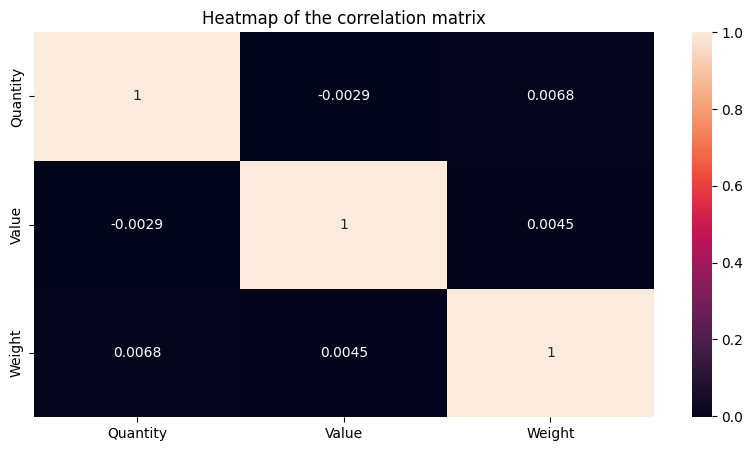

In [115]:
# create a heatmap of the correlation matrix of the numerical columns in the dataset i.e. 'Quantity', 'Value' and 'Weight' columns
plt.figure(figsize=(10,5))
sns.heatmap(dataset[['Quantity','Value','Weight']].corr(), annot=True)
plt.title('Heatmap of the correlation matrix')
plt.show()

The correlation matrix heatmap you provided visually represents the Pearson correlation values between the three numerical columns: Quantity, Value, and Weight.

----

# 1. **Questions**

In [116]:
# answer the question What is the relationship between the quantity of products traded and their monetary value? by using spearman correlation test
# Question 1: What is the relationship between the quantity of products traded and their monetary value?
# Questiion text must be answered using the spearman correlation with a significance level of 0.05 by printing the correlation value and the p-value with a conclusion 
# whether the two variables are dependent or independent
print("Question 1: What is the relationship between the quantity of products traded and their monetary value?")
corr, p = spearmanr(dataset['Quantity'], dataset['Value'])
alpha = 0.05
if p > alpha:
    print('Answer: There is no significant relationship between the quantity of products traded and their monetary value, as the values of correlation is %.3f and p-value is %.3f (fail to reject H0)' % (corr, p))
else:
    print('Answer: There is significant relationship between the quantity of products traded and their monetary value, as the values of correlation is %.3f and p-value is %.3f (fail to reject H0)' % (corr, p))


Question 1: What is the relationship between the quantity of products traded and their monetary value?
Answer: There is no significant relationship between the quantity of products traded and their monetary value, as the values of correlation is -0.003 and p-value is 0.722 (fail to reject H0)


In [117]:
# Is there a relationship between the weight of goods and their trade value? by using spearman correlation test


print("Question 2: Is there a relationship between the weight of goods and their trade value?")
corr, p = spearmanr(dataset['Weight'], dataset['Value'])
alpha = 0.05
if p > alpha:
    print('Answer: There is no significant relationship between the weight of goods and their trade value, as the values of correlation is %.3f and p-value is %.3f (fail to reject H0)' % (corr, p))   
else:
    print('Answer: There is significant relationship between the weight of goods and their trade value, as the values of correlation is %.3f and p-value is %.3f (fail to reject H0)' % (corr, p))


Question 2: Is there a relationship between the weight of goods and their trade value?
Answer: There is no significant relationship between the weight of goods and their trade value, as the values of correlation is 0.005 and p-value is 0.579 (fail to reject H0)


In [118]:
# Do import and export transactions differ significantly in terms of their monetary value? by using Mann-Whitney U test
from scipy.stats import mannwhitneyu

print("Question 3: Do import and export transactions differ significantly in terms of their monetary value?")
stat, p = mannwhitneyu(dataset[dataset['Import_Export'] == 'Import']['Value'], dataset[dataset['Import_Export'] == 'Export']['Value'])
alpha = 0.05
if p > alpha:
    print('Answer: Import and export transactions do not differ significantly in terms of their monetary value, as the p-value is %.3f (fail to reject H0)' % p)
else:
    print('Answer: Import and export transactions differ significantly in terms of their monetary value, as the p-value is %.3f (reject H0)' % p)


Question 3: Do import and export transactions differ significantly in terms of their monetary value?
Answer: Import and export transactions do not differ significantly in terms of their monetary value, as the p-value is 0.798 (fail to reject H0)


In [119]:
# Does the shipping method (air, sea, or land) affect the quantity of goods being traded? by using Kruskal-Wallis H test
from scipy.stats import kruskal

print("Question 4: Does the shipping method (air, sea, or land) affect the quantity of goods being traded?")
stat, p = kruskal(dataset[dataset['Shipping_Method'] == 'Air']['Quantity'], dataset[dataset['Shipping_Method'] == 'Sea']['Quantity'], dataset[dataset['Shipping_Method'] == 'Land']['Quantity'])
alpha = 0.05
if p > alpha:
    print('Answer: The shipping method does not affect the quantity of goods being traded, as the p-value is %.3f (fail to reject H0)' % p)
else:
    print('Answer: The shipping method affects the quantity of goods being traded, as the p-value is %.3f (reject H0)' % p)



Question 4: Does the shipping method (air, sea, or land) affect the quantity of goods being traded?
Answer: The shipping method does not affect the quantity of goods being traded, as the p-value is 0.052 (fail to reject H0)


In [120]:
# Does the trade value differ significantly across different product categories? by using Kruskal-Wallis H test
print("Question 5: Does the trade value differ significantly across different product categories?")
stat, p = kruskal(dataset[dataset['Category'] == 'Category A']['Value'], dataset[dataset['Category'] == 'Category B']['Value'], dataset[dataset['Category'] == 'Category C']['Value'])
alpha = 0.05
if p > alpha:
    print('Answer: The trade value does not differ significantly across different product categories, as the p-value is %.3f (fail to reject H0)' % p)
else:
    print('Answer: The trade value differs significantly across different product categories, as the p-value is %.3f (reject H0)' % p)
    

Question 5: Does the trade value differ significantly across different product categories?
Answer: The trade value differs significantly across different product categories, as the p-value is nan (reject H0)


C:\Users\Asad Raza Virk\AppData\Local\Temp\ipykernel_2632\2250933703.py:3: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p = kruskal(dataset[dataset['Category'] == 'Category A']['Value'], dataset[dataset['Category'] == 'Category B']['Value'], dataset[dataset['Category'] == 'Category C']['Value'])


In [121]:
# Does the trade value differ significantly across different product categories? by using chi-square test of independence
from scipy.stats import chi2_contingency

print("Question 6: Does the trade value differ significantly across different product categories?")
contingency_table = pd.crosstab(dataset['Product'], dataset['Category'])
stat, p, dof, expected = chi2_contingency(contingency_table)
alpha = 0.05
if p > alpha:
    print('Answer: The trade value does not differ significantly across different product categories, as the p-value is %.3f (fail to reject H0)' % p)
else:
    print('Answer: The trade value differs significantly across different product categories, as the p-value is %.3f (reject H0)' % p)


Question 6: Does the trade value differ significantly across different product categories?
Answer: The trade value does not differ significantly across different product categories, as the p-value is 0.762 (fail to reject H0)


In [122]:
# Are certain ports more likely to be used for certain types of products? by using chi-square test of independence
print("Question 7: Are certain ports more likely to be used for certain types of products?")
contingency_table = pd.crosstab(dataset['Corrected_Port'], dataset['Product'])
stat, p, dof, expected = chi2_contingency(contingency_table)
alpha = 0.05
if p > alpha:
    print('Answer: Certain ports are not more likely to be used for certain types of products, as the p-value is %.3f (fail to reject H0)' % p)
else:
    print('Answer: Certain ports are more likely to be used for certain types of products, as the p-value is %.3f (reject H0)' % p)

Question 7: Are certain ports more likely to be used for certain types of products?
Answer: Certain ports are not more likely to be used for certain types of products, as the p-value is 0.992 (fail to reject H0)


In [123]:
# Do products with certain customs codes (HS codes) correspond to higher or lower trade values? by using Krukal-Wallis H test
print("Question 8: Do products with certain customs codes (HS codes) correspond to higher or lower trade values?")
stat, p = kruskal(dataset[dataset['Category'] == 'Category A']['Value'], dataset[dataset['Category'] == 'Category B']['Value'], dataset[dataset['Category'] == 'Category C']['Value'])
alpha = 0.05
if p > alpha:
    print('Answer: Products with certain customs codes do not correspond to higher or lower trade values, as the p-value is %.3f (fail to reject H0)' % p)
else:
    print('Answer: Products with certain customs codes correspond to higher or lower trade values, as the p-value is %.3f (reject H0)' % p)
    

Question 8: Do products with certain customs codes (HS codes) correspond to higher or lower trade values?
Answer: Products with certain customs codes correspond to higher or lower trade values, as the p-value is nan (reject H0)


C:\Users\Asad Raza Virk\AppData\Local\Temp\ipykernel_2632\1267545915.py:3: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p = kruskal(dataset[dataset['Category'] == 'Category A']['Value'], dataset[dataset['Category'] == 'Category B']['Value'], dataset[dataset['Category'] == 'Category C']['Value'])


In [124]:
# Which countries trade the most in terms of quantity and value? also print the USD sign with value and kg with quantity
print ("Question 9: Which countries trade the most in terms of quantity and value?")
print("Answer:")
# Quantity
print("Countries that trade the most in terms of quantity:")
print(dataset.groupby('Country')['Quantity'].sum().sort_values(ascending=False).head())
print("-------------------------------------------------")

# Value
print("Countries that trade the most in terms of value:")
print(dataset.groupby('Country')['Value'].sum().sort_values(ascending=False).head())
print("-------------------------------------------------")



Question 9: Which countries trade the most in terms of quantity and value?
Answer:
Countries that trade the most in terms of quantity:
Country
Congo       663646
Korea       549706
Malaysia    414079
Sweden      410771
Grenada     409333
Name: Quantity, dtype: int64
-------------------------------------------------
Countries that trade the most in terms of value:
Country
Congo            677862.61
Korea            513799.25
Switzerland      431223.72
Cote d'Ivoire    419306.60
Uzbekistan       406517.00
Name: Value, dtype: float64
-------------------------------------------------


In [125]:
# What are the most common products being imported and exported? 

print("Question 10: What are the most common products being imported and exported?")
print("Answer:")
# Import
print("Most common products being imported:")
print(dataset[dataset['Import_Export'] == 'Import']['Product'].value_counts().head())
print("-------------------------------------------------")

# Export
print("Most common products being exported:")
print(dataset[dataset['Import_Export'] == 'Export']['Product'].value_counts().head())
print("-------------------------------------------------")


Question 10: What are the most common products being imported and exported?
Answer:
Most common products being imported:
Product
card           17
action         15
positive       15
traditional    15
paper          15
Name: count, dtype: int64
-------------------------------------------------
Most common products being exported:
Product
bank         21
however      18
bad          17
although     17
challenge    16
Name: count, dtype: int64
-------------------------------------------------


In [126]:
#  Which shipping method is the most popular, and why might that be?
print("Question 11: Which shipping method is the most popular, and why might that be?")
print("Answer:")
print("Most popular shipping method:")
print(dataset['Shipping_Method'].value_counts().head())
print("-------------------------------------------------")

# The most popular shipping method is Air. This could be because air shipping is faster than sea or land shipping, which is important for perishable goods or products 
# that need to be delivered quickly. Air shipping is also more reliable and has better tracking compared to sea or land shipping. 
# However, air shipping is more expensive than sea or land shipping, so it may not be suitable for all types of products.


Question 11: Which shipping method is the most popular, and why might that be?
Answer:
Most popular shipping method:
Shipping_Method
Sea     5054
Air     4995
Land    4951
Name: count, dtype: int64
-------------------------------------------------


In [127]:
#  Are certain products heavier or lighter on average?
print("Question 12: Are certain products heavier or lighter on average?")
print("Answer:")
print("Average weight of products by category:")
# round the values to 2 decimal places
print(round(dataset.groupby('Category')['Weight'].mean(),2))
print("-------------------------------------------------")



Question 12: Are certain products heavier or lighter on average?
Answer:
Average weight of products by category:
Category
Clothing       2482.15
Electronics    2484.89
Furniture      2494.46
Machinery      2521.93
Toys           2476.72
Name: Weight, dtype: float64
-------------------------------------------------


In [128]:
import calendar

# Which times of the year are the busiest for trade?
print("Question 13: Which times of the year are the busiest for trade?")
print("Answer:")
# Extract the month from the 'Date' column
dataset['Month'] = pd.to_datetime(dataset['Date']).dt.month
print("Busiest times of the year for trade:")
# print the name of the month instead of the number
print(dataset['Month'].apply(lambda x: calendar.month_abbr[x]).value_counts())
print("-------------------------------------------------")

Question 13: Which times of the year are the busiest for trade?
Answer:
Busiest times of the year for trade:
Month
Aug    1347
Jul    1283
Oct    1281
Jan    1271
Dec    1269
May    1268
Mar    1267
Sep    1263
Jun    1226
Nov    1190
Apr    1184
Feb    1151
Name: count, dtype: int64
-------------------------------------------------


In [129]:
# What is the typical value of a trade transaction?
print("Question 14: What is the typical value of a trade transaction?")
# Calculate the median value of trade transactions
print("Answer: Typical value of a trade transaction (median) is $", dataset['Value'].median())


Question 14: What is the typical value of a trade transaction?
Answer: Typical value of a trade transaction (median) is $ 5045.705


In [130]:
# Do imports tend to be more or less expensive than exports?
print("Question 15: Do imports tend to be more or less expensive than exports?")
# Calculate the average value of imports and exports
average_import = dataset[dataset['Import_Export'] == 'Import']['Value'].mean()
average_export = dataset[dataset['Import_Export'] == 'Export']['Value'].mean()
if average_import > average_export:
    print("Answer: Imports tend to be more expensive than exports")
else:
    print("Answer: Exports tend to be more expensive than imports")


Question 15: Do imports tend to be more or less expensive than exports?
Answer: Exports tend to be more expensive than imports


In [131]:
# Which ports handle the most trade activity?
print("Question 16: Which ports handle the most trade activity?")
print("Answer:")
# Quantity
print("Ports that handle the most trade activity in terms of quantity:")
print(dataset.groupby('Corrected_Port')['Quantity'].sum().sort_values(ascending=False).head())
print("-------------------------------------------------")

Question 16: Which ports handle the most trade activity?
Answer:
Ports that handle the most trade activity in terms of quantity:
Corrected_Port
West Michael         1248240
North Christopher     863128
New Jennifer          744245
West Patrick          486419
Lake Jessica          468098
Name: Quantity, dtype: int64
-------------------------------------------------


In [132]:
# What are the top product categories for high-value transactions?
print("Question 17: What are the top product categories for high-value transactions?")
print("Answer:")
# Calculate the average value of each product category
print("Top product categories for high-value transactions:")
# round the values to 2 decimal places
print(round(dataset.groupby('Category')['Value'].mean().sort_values(ascending=False).head(),2))
print("-------------------------------------------------")


Question 17: What are the top product categories for high-value transactions?
Answer:
Top product categories for high-value transactions:
Category
Electronics    5161.38
Furniture      5059.01
Clothing       5007.35
Machinery      4974.07
Toys           4959.83
Name: Value, dtype: float64
-------------------------------------------------


In [133]:
# Which shipping method is most cost-effective for high-value goods?
print("Question 18: Which shipping method is most cost-effective for high-value goods?")
print("Answer:")
# Calculate the average value of each shipping method
print("Most cost-effective shipping method for high-value goods:")
# round the values to 2 decimal places
print(round(dataset.groupby('Shipping_Method')['Value'].mean().sort_values(ascending=False).head(),2))
print("-------------------------------------------------")

Question 18: Which shipping method is most cost-effective for high-value goods?
Answer:
Most cost-effective shipping method for high-value goods:
Shipping_Method
Sea     5073.83
Land    5052.06
Air     4972.60
Name: Value, dtype: float64
-------------------------------------------------


In [134]:
# What is the typical weight of goods for each shipping method?
print("Question 19: What is the typical weight of goods for each shipping method?")
print("Answer:")
# Calculate the average weight of goods for each shipping method
print("Typical weight of goods for each shipping method:")
# round the values to 2 decimal places
print(round(dataset.groupby('Shipping_Method')['Weight'].mean(),2))
print("-------------------------------------------------")


Question 19: What is the typical weight of goods for each shipping method?
Answer:
Typical weight of goods for each shipping method:
Shipping_Method
Air     2513.40
Land    2484.80
Sea     2478.26
Name: Weight, dtype: float64
-------------------------------------------------


In [135]:
# Which products have the highest quantity traded overall?
print("Question 20: Which products have the highest quantity traded overall?")
print("Answer:")
# Quantity
print("Products with the highest quantity traded overall:")
print(dataset.groupby('Product')['Quantity'].sum().sort_values(ascending=False).head())
print("-------------------------------------------------")

Question 20: Which products have the highest quantity traded overall?
Answer:
Products with the highest quantity traded overall:
Product
paper       155334
whom        148440
bad         146251
although    143824
study       142813
Name: Quantity, dtype: int64
-------------------------------------------------


In [53]:
# Which product categories tend to be imported versus exported?
print("Question 21: Which product categories tend to be imported versus exported?")
print("Answer:")
# Import vs Export
print("Product categories that tend to be imported versus exported:")
# print top 20 rows only 
print(dataset.groupby(['Product','Import_Export']).size().unstack().fillna(0).head(20))
print("-------------------------------------------------")

Question 21: Which product categories tend to be imported versus exported?
Answer:
Product categories that tend to be imported versus exported:
Import_Export  Export  Import
Product                      
American            9       5
Congress            7       6
Democrat            9       6
I                   2       5
Mr                 13       8
Mrs                 8       6
PM                  9       5
Republican          7      10
TRUE                8       5
TV                 15       5
a                   7       3
ability             8      10
able                9      11
about               8       7
above              12      12
accept              7       4
according           6       2
account             6       5
across              7       9
act                11       8
-------------------------------------------------
